In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Masaüstü\MIS220\Code\.vscode\train.csv", header=None)

In [4]:
df.head

<bound method NDFrame.head of            0       1       2       3     4   5     6       7    8    9    ...  \
0        69769    -946  0.1613  0.7960  Panl   N  Bus2  0.0742    0    2  ...   
1       236977     -92     NaN     NaN   NaN   Y  Othr     NaN    0    3  ...   
2       168821   -1646  0.1124  0.8504  Panl   N  Bus3  0.0387    0    2  ...   
3        94708   -1651  0.0263     NaN  Blok   N  Bus3     NaN    0    2  ...   
4        84556    -977     NaN     NaN   NaN   N  Rest     NaN    0    2  ...   
...        ...     ...     ...     ...   ...  ..   ...     ...  ...  ...  ...   
246003  248161    -595     NaN     NaN   NaN   N  Bus3     NaN    0    2  ...   
246004  257069   -4334  0.1145  0.8368  Panl   N  Mede  0.1180    0    2  ...   
246005  154350  365243  0.3025  0.6056  Mixd   N  XNAA  0.2233    0    2  ...   
246006  148183  365243     NaN     NaN   NaN   N  XNAA     NaN    0    3  ...   
246007    5167  365243     NaN     NaN   NaN   Y  XNAA     NaN    0    2  ...  

In [3]:
df.shape

(246008, 122)

In [5]:
num_cols = len(df.columns)
df.columns = ["C" + str(i) for i in range(1, num_cols+1)]

In [6]:
df.head

<bound method NDFrame.head of             C1      C2      C3      C4    C5 C6    C7      C8  C9  C10  ...  \
0        69769    -946  0.1613  0.7960  Panl  N  Bus2  0.0742   0    2  ...   
1       236977     -92     NaN     NaN   NaN  Y  Othr     NaN   0    3  ...   
2       168821   -1646  0.1124  0.8504  Panl  N  Bus3  0.0387   0    2  ...   
3        94708   -1651  0.0263     NaN  Blok  N  Bus3     NaN   0    2  ...   
4        84556    -977     NaN     NaN   NaN  N  Rest     NaN   0    2  ...   
...        ...     ...     ...     ...   ... ..   ...     ...  ..  ...  ...   
246003  248161    -595     NaN     NaN   NaN  N  Bus3     NaN   0    2  ...   
246004  257069   -4334  0.1145  0.8368  Panl  N  Mede  0.1180   0    2  ...   
246005  154350  365243  0.3025  0.6056  Mixd  N  XNAA  0.2233   0    2  ...   
246006  148183  365243     NaN     NaN   NaN  N  XNAA     NaN   0    3  ...   
246007    5167  365243     NaN     NaN   NaN  Y  XNAA     NaN   0    2  ...   

        C113  C114   

In [7]:
df.dtypes

C1        int64
C2        int64
C3      float64
C4      float64
C5       object
         ...   
C118     object
C119    float64
C120    float64
C121      int64
C122      int64
Length: 122, dtype: object

In [8]:
df.isnull().sum()
#I found how many nulls does this dataset has in each colum.

C1           0
C2           0
C3      143829
C4      163543
C5      124975
         ...  
C118         0
C119       811
C120    122297
C121         0
C122         0
Length: 122, dtype: int64

In [9]:
NaColumn = df.columns[df.isnull().mean()>=0.10]
df= df.drop(NaColumn, axis=1)
#If more than 10% of the values in a column are null, we have removed those columns from the dataset.

In [10]:
df.shape

(246008, 65)

In [11]:
df.isnull().sum()

C1        0
C2        0
C6        0
C7        0
C9        0
       ... 
C117      0
C118      0
C119    811
C121      0
C122      0
Length: 65, dtype: int64

In [12]:
df_numeric_columns = df.select_dtypes(include='number').columns
print(df_numeric_columns)
#column numbers of numeric columns

Index(['C1', 'C2', 'C9', 'C10', 'C14', 'C16', 'C20', 'C21', 'C24', 'C25',
       'C26', 'C27', 'C28', 'C29', 'C30', 'C34', 'C36', 'C38', 'C41', 'C42',
       'C43', 'C47', 'C51', 'C53', 'C54', 'C56', 'C58', 'C63', 'C64', 'C65',
       'C66', 'C67', 'C71', 'C72', 'C73', 'C74', 'C76', 'C77', 'C82', 'C86',
       'C95', 'C98', 'C99', 'C100', 'C101', 'C105', 'C106', 'C107', 'C109',
       'C114', 'C117', 'C119', 'C121', 'C122'],
      dtype='object')


In [13]:
df_numeric = df[df_numeric_columns]
print(df_numeric)
#return numeric columns

            C1      C2  C9  C10       C14  C16  C20  C21  C24  C25  ...  C101  \
0        69769    -946   0    2  180000.0    0    0    0    0    0  ...     0   
1       236977     -92   0    3  135000.0    0    0    0    0    0  ...     0   
2       168821   -1646   0    2  553500.0    0    0    1    0    0  ...     0   
3        94708   -1651   0    2  391500.0    0    0    1    0    0  ...     0   
4        84556    -977   0    2  225000.0    0    0    0    0    0  ...     0   
...        ...     ...  ..  ...       ...  ...  ...  ...  ...  ...  ...   ...   
246003  248161    -595   0    2  405000.0    0    0    0    0    1  ...     0   
246004  257069   -4334   0    2  225000.0    0    0    0    0    0  ...     0   
246005  154350  365243   0    2  234000.0    0    0    0    0    0  ...     0   
246006  148183  365243   0    3  810000.0    0    0    1    0    0  ...     0   
246007    5167  365243   0    2  877500.0    0    0    1    0    0  ...     0   

        C105  C106  C107  C

In [14]:
#Code to find outliers
outliers = {}
for column in df_numeric:
    Q1 = df[column].quantile(1/4)
    Q3 = df[column].quantile(3/4)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    outliers[column] = column_outliers

In [15]:
outliers

{'C1': Series([], Name: C1, dtype: int64),
 'C2': 5         365243
 13         -7686
 17         -7377
 24        365243
 30        365243
            ...  
 245994     -8454
 246002     -7799
 246005    365243
 246006    365243
 246007    365243
 Name: C2, Length: 57668, dtype: int64,
 'C9': 6         1
 999       1
 1050      1
 1155      1
 1169      1
          ..
 244773    1
 244774    1
 245347    1
 245767    1
 245992    1
 Name: C9, Length: 832, dtype: int64,
 'C10': 1         3
 15        1
 19        3
 22        1
 23        1
          ..
 245995    3
 245998    3
 245999    3
 246001    3
 246006    3
 Name: C10, Length: 62386, dtype: int64,
 'C14': 12        1575000.0
 48        1800000.0
 55        1800000.0
 56        1350000.0
 59        1350000.0
             ...    
 245933    1350000.0
 245953    1575000.0
 245971    1476000.0
 245976    1818000.0
 245981    1800000.0
 Name: C14, Length: 11791, dtype: float64,
 'C16': 90        1
 586       1
 1079      1
 2218   

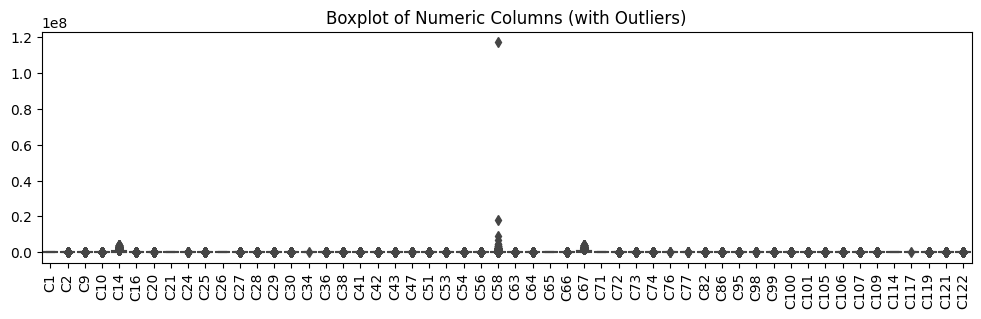

In [26]:
plt.figure(figsize=(12, 3))
sns.boxplot(data = df_numeric)
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Columns (with Outliers)")
plt.show()

In [16]:
df_numeric

,C1,C2,C9,C10,C14,C16,C20,C21,C24,C25,...,C101,C105,C106,C107,C109,C114,C117,C119,C121,C122
0,69769,-946,0,2,180000.0,0,0,0,0,0,...,0,1,0,0,0,-4670,0,0.0,0,0
1,236977,-92,0,3,135000.0,0,0,0,0,0,...,0,1,0,0,0,-1994,0,0.0,0,0
2,168821,-1646,0,2,553500.0,0,0,1,0,0,...,0,1,0,0,0,-2842,0,0.0,0,1
3,94708,-1651,0,2,391500.0,0,0,1,0,0,...,0,1,0,0,0,-1345,0,0.0,0,1
4,84556,-977,0,2,225000.0,0,0,0,0,0,...,0,1,0,0,0,-852,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,248161,-595,0,2,405000.0,0,0,0,0,1,...,0,1,0,0,0,-4420,0,0.0,0,0
246004,257069,-4334,0,2,225000.0,0,0,0,0,0,...,0,1,0,0,0,-2561,0,0.0,0,0
246005,154350,365243,0,2,234000.0,0,0,0,0,0,...,0,0,0,0,0,-4636,0,0.0,0,0
246006,148183,365243,0,3,810000.0,0,0,1,0,0,...,0,0,0,0,0,-4636,0,0.0,0,1


There is not so much outliers, so  ı will not use median in this dataset

                                            GRAPHS OF NUMERIC COLUMNS (For better undersstanding the data)

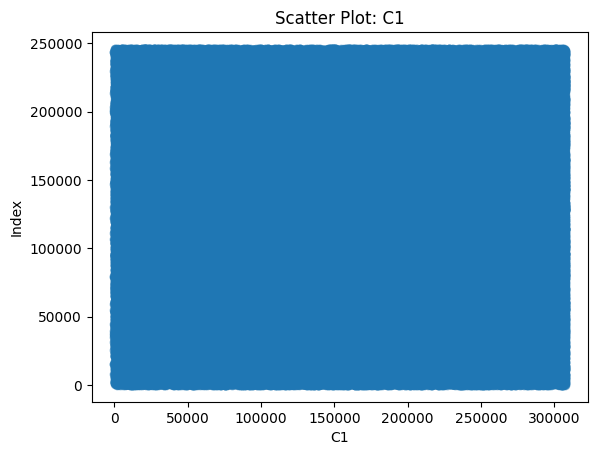

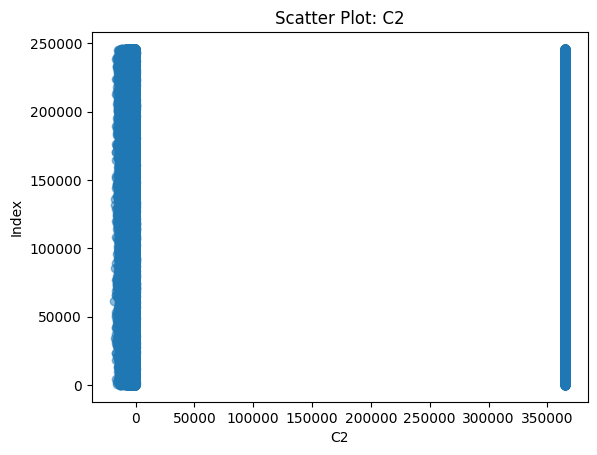

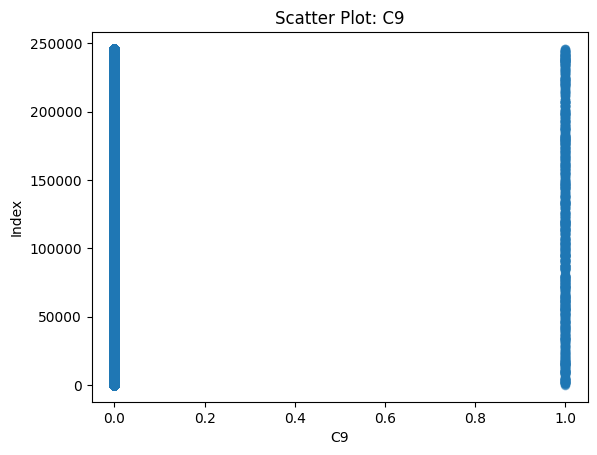

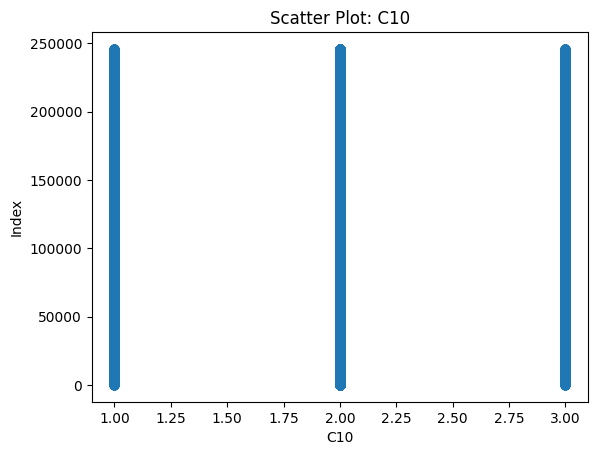

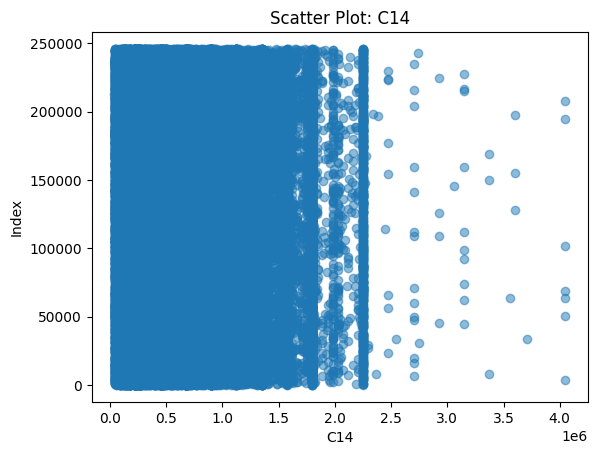

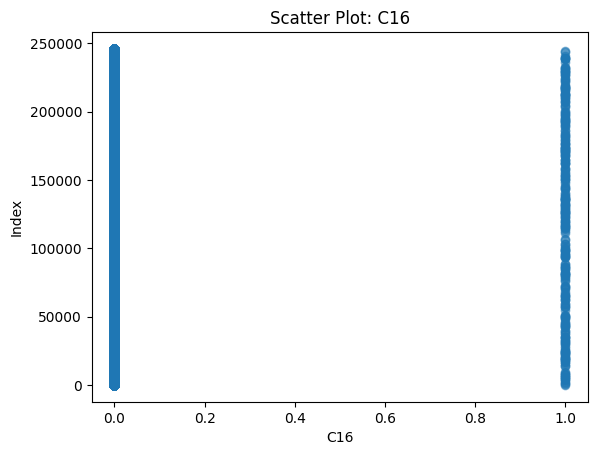

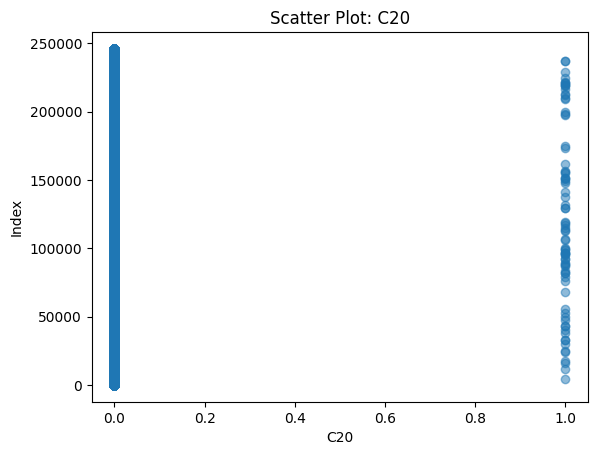

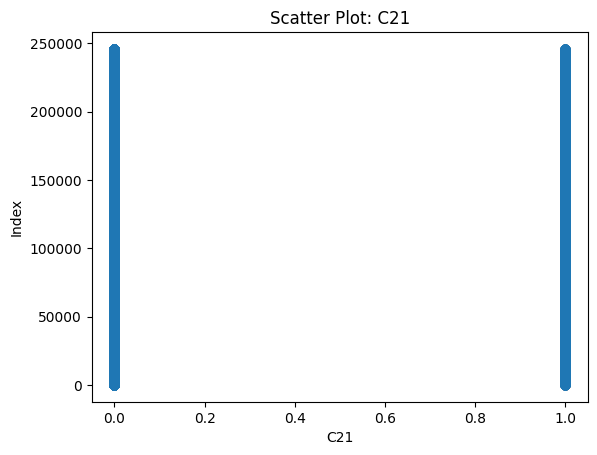

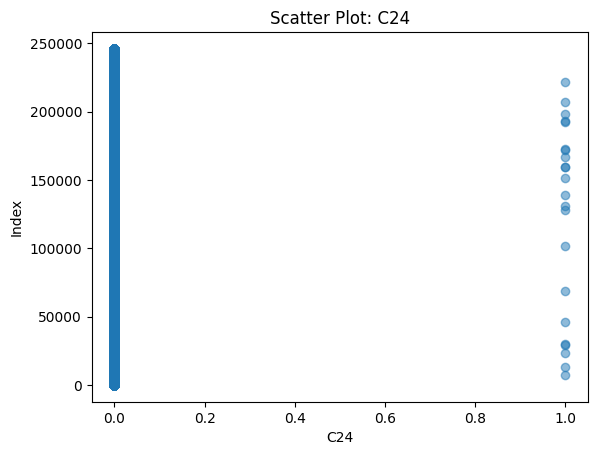

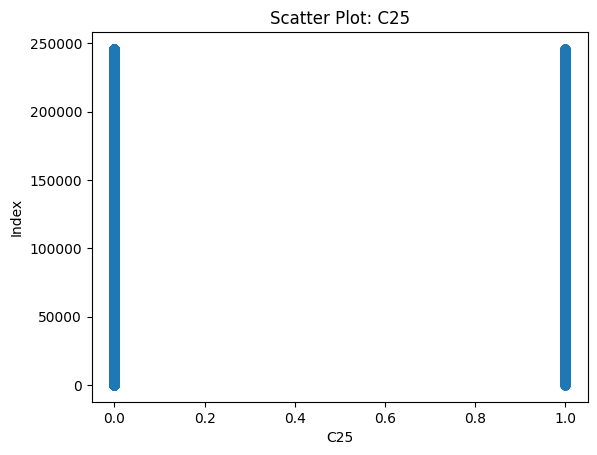

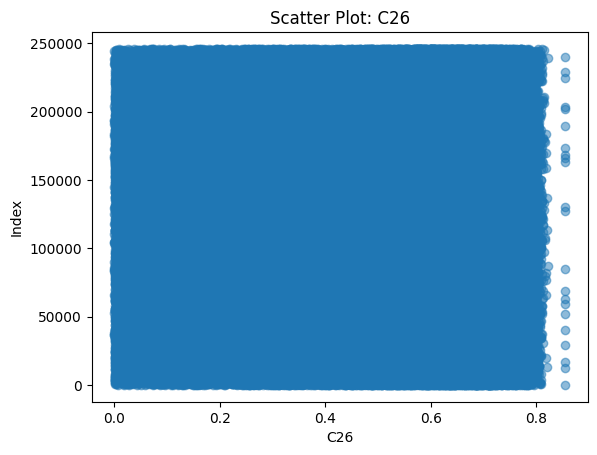

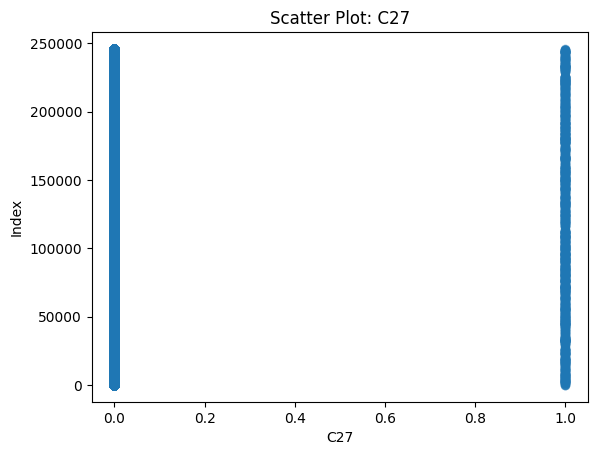

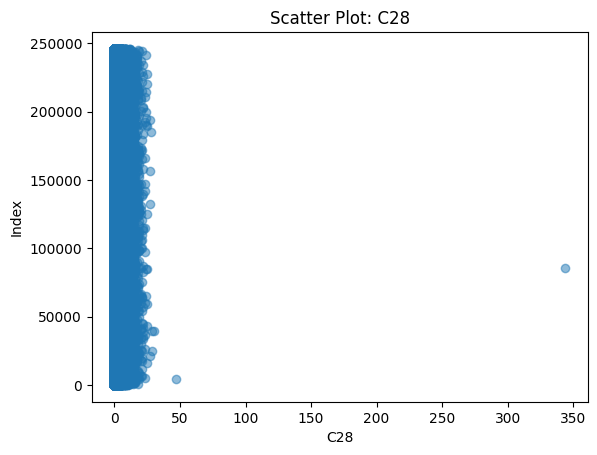

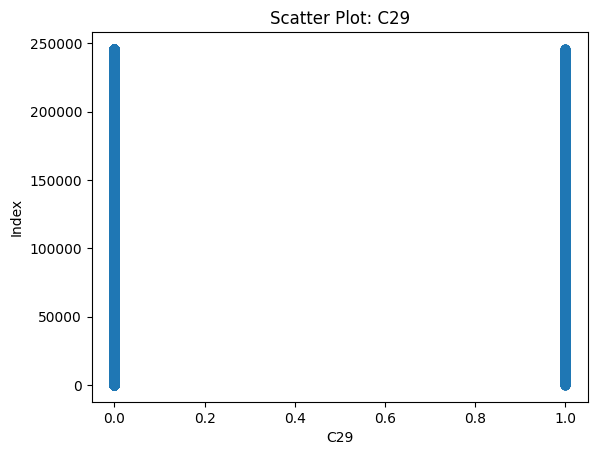

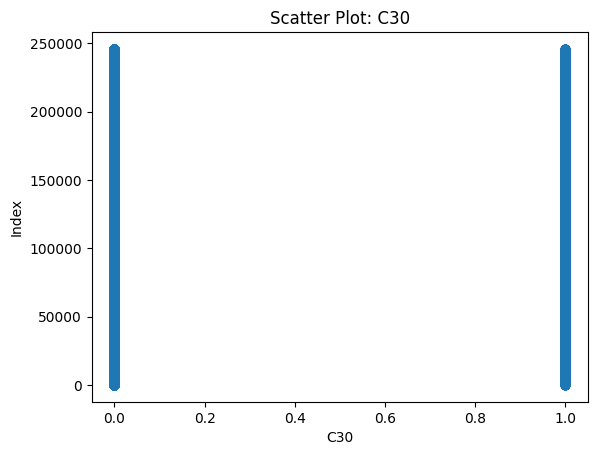

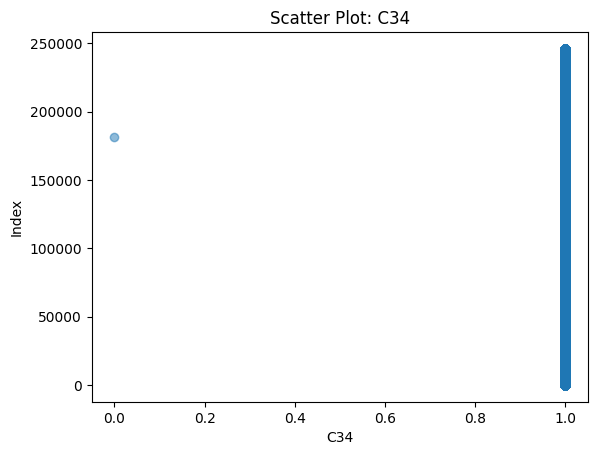

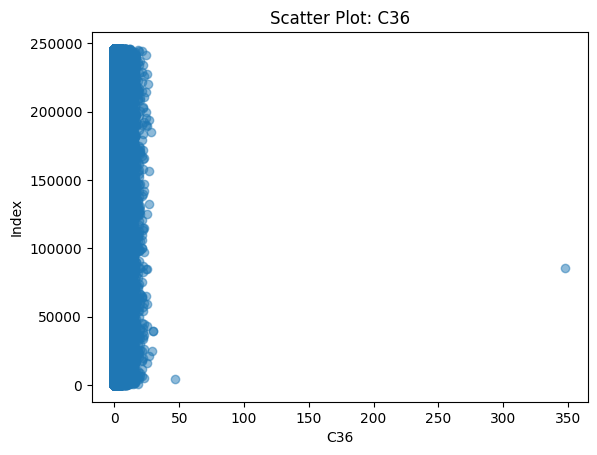

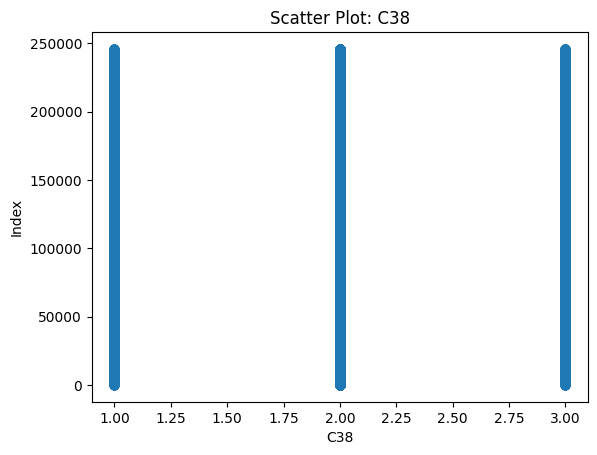

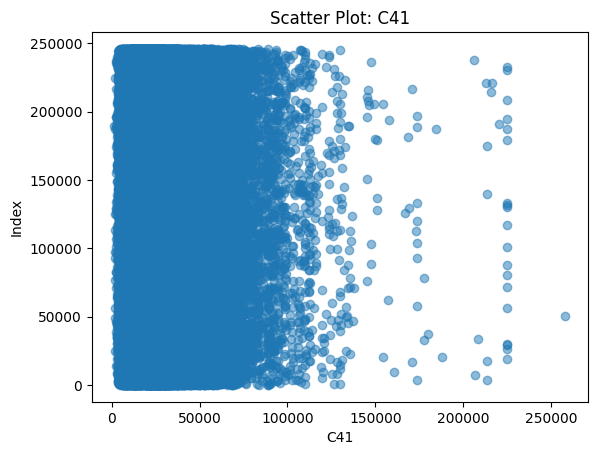

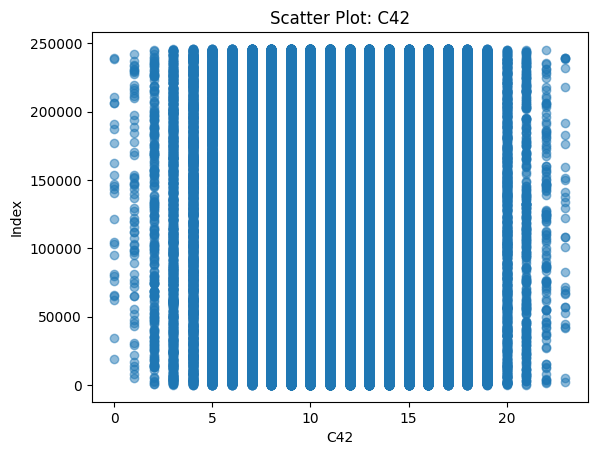

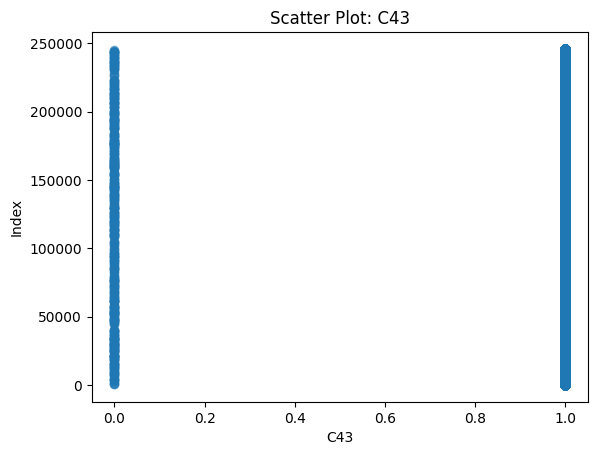

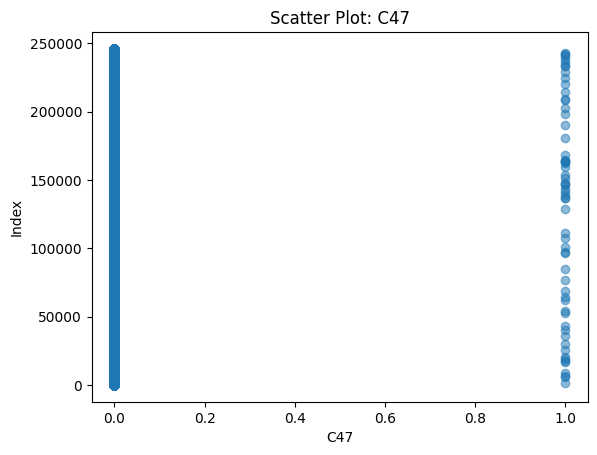

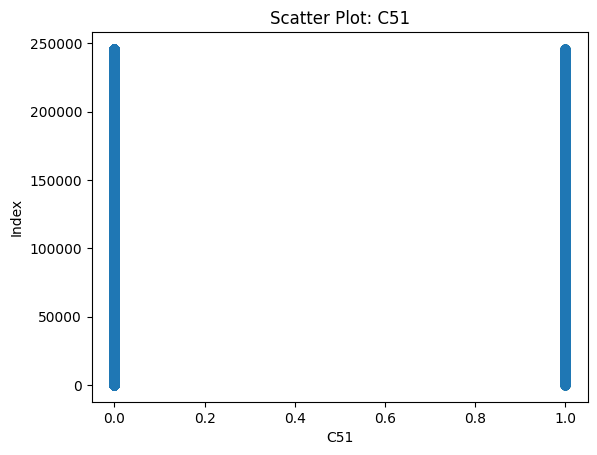

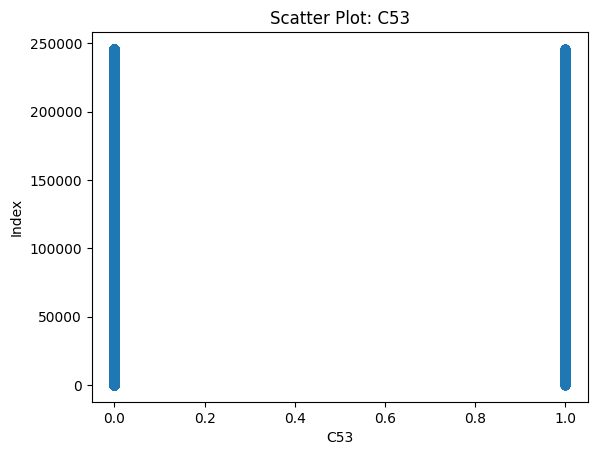

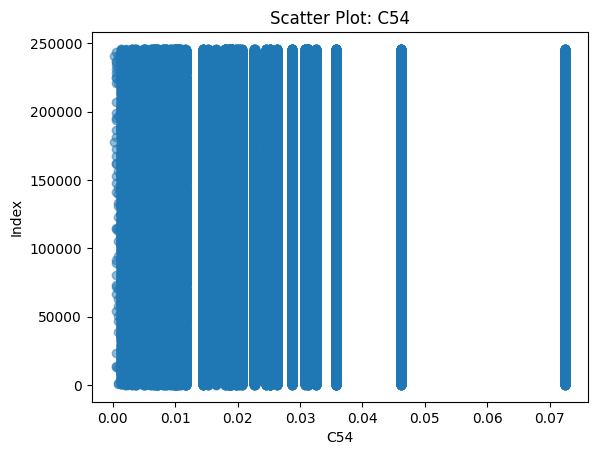

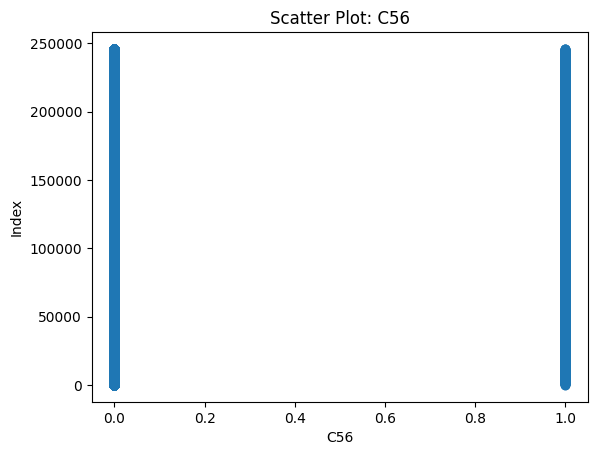

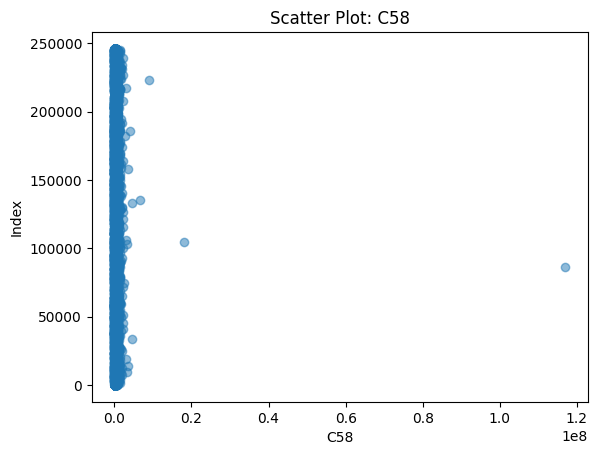

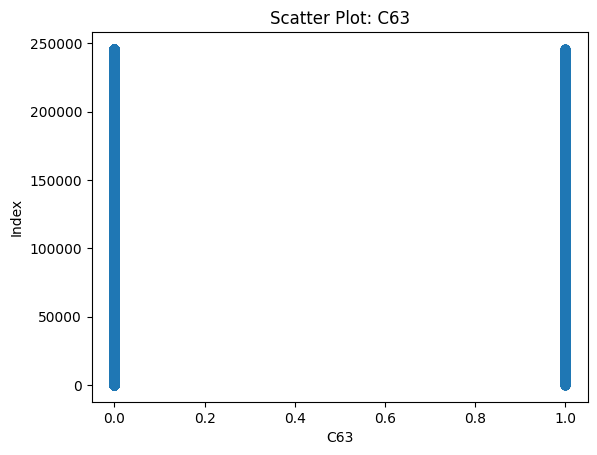

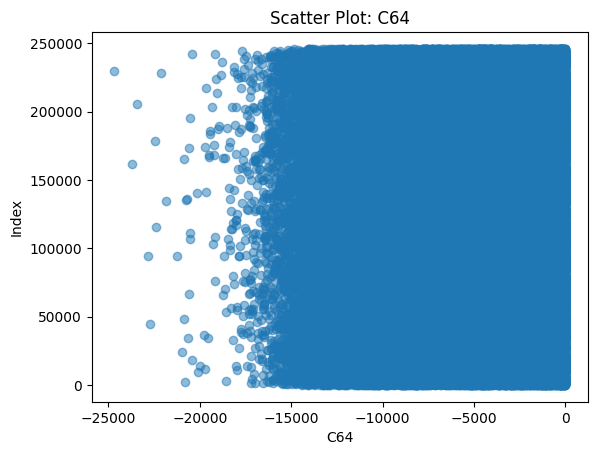

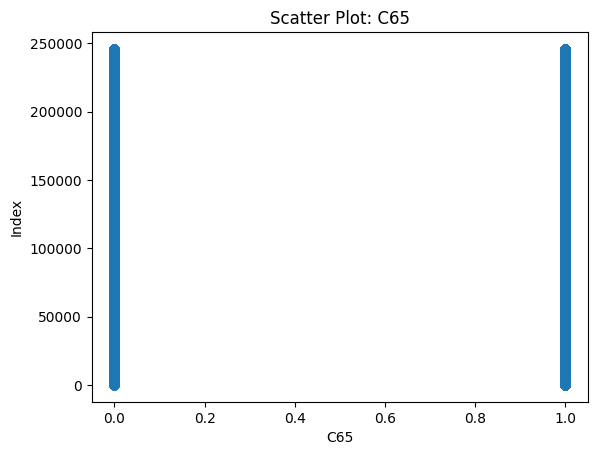

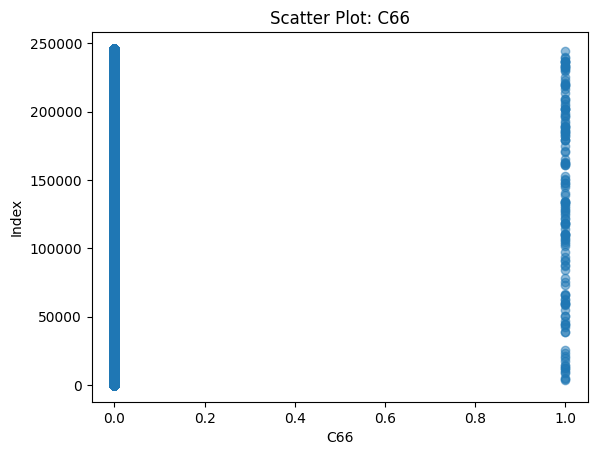

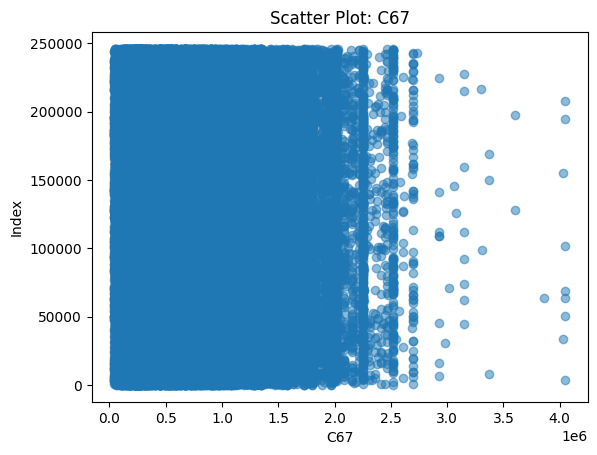

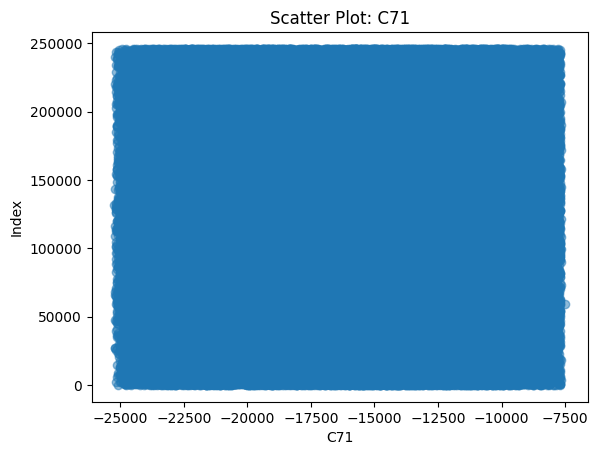

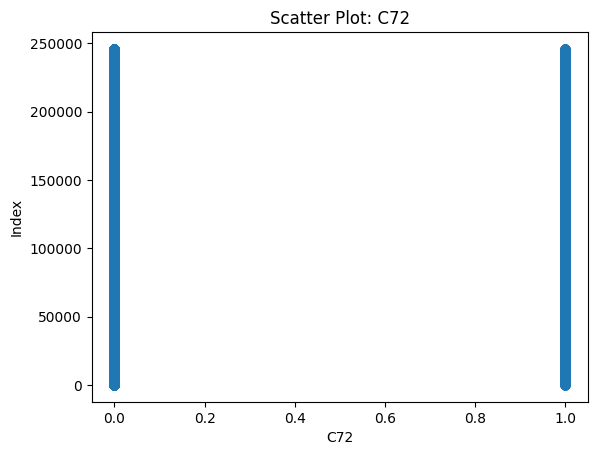

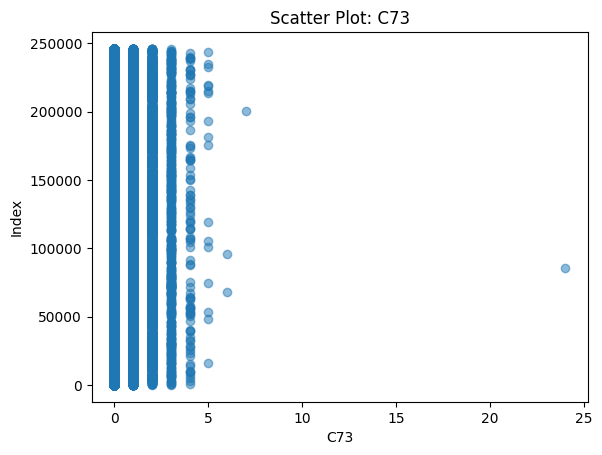

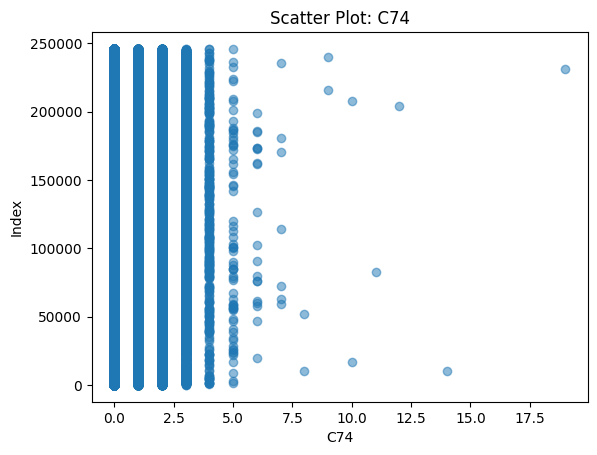

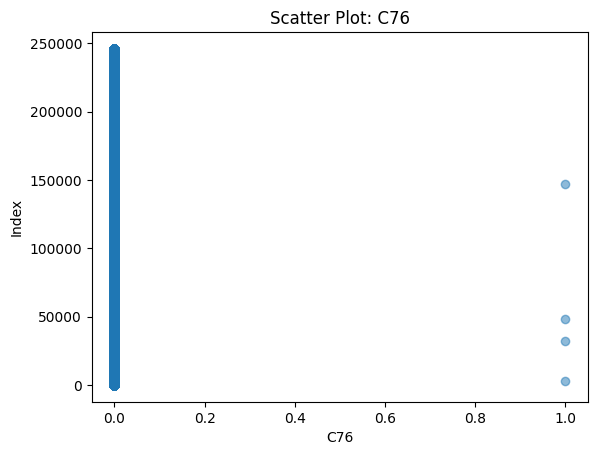

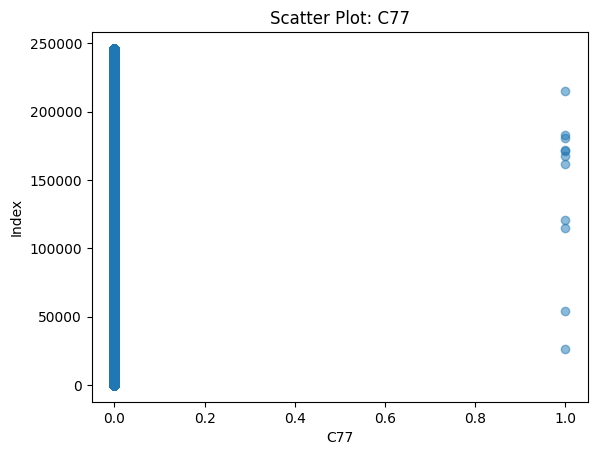

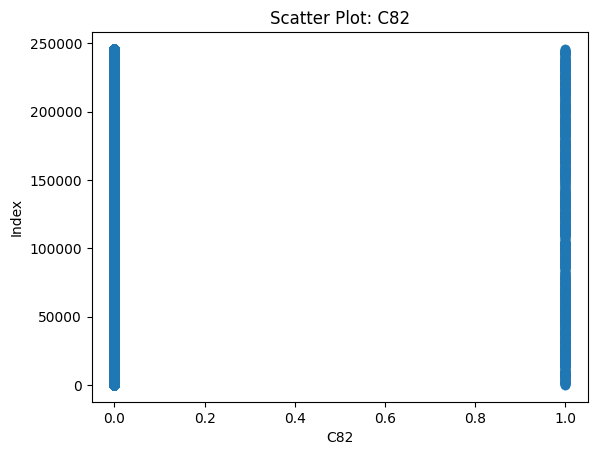

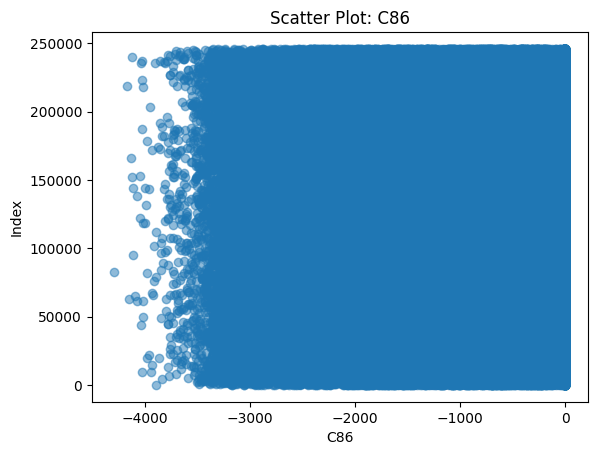

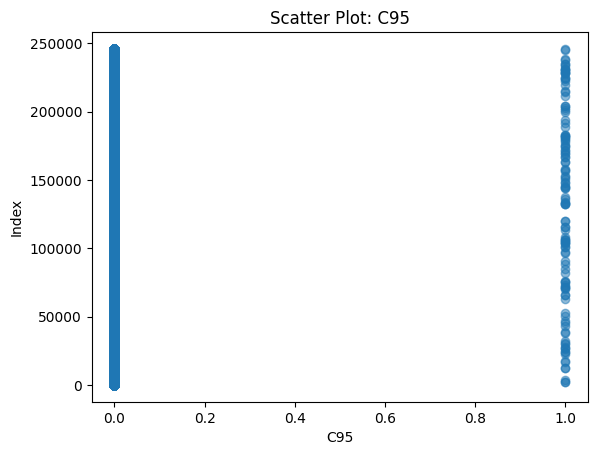

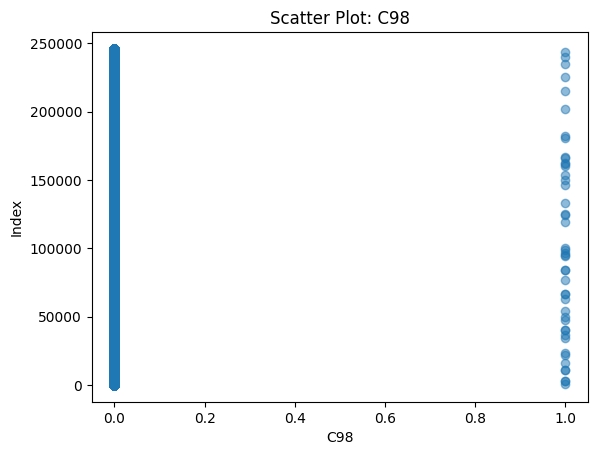

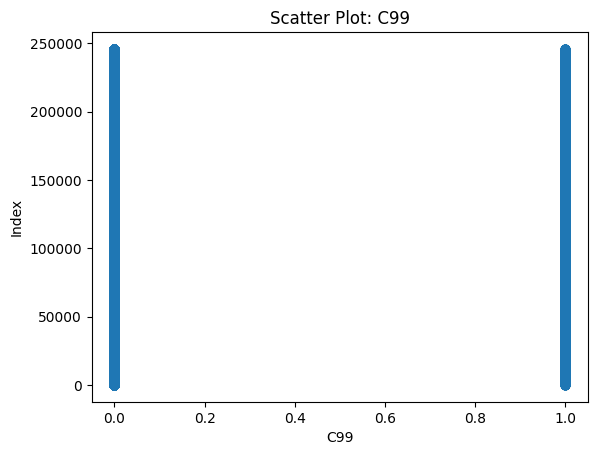

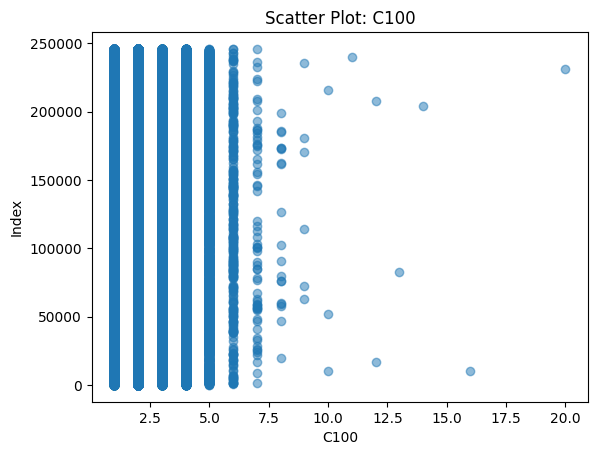

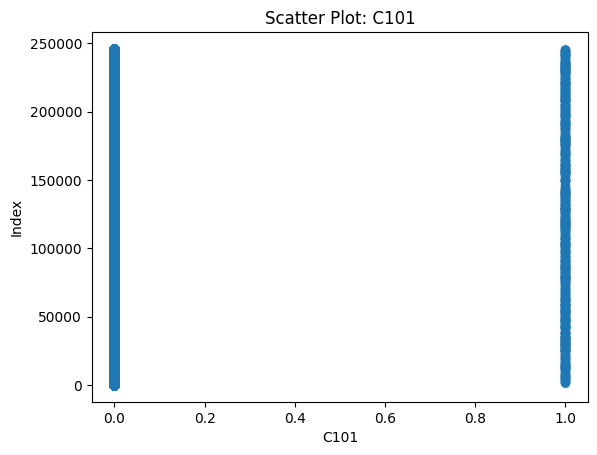

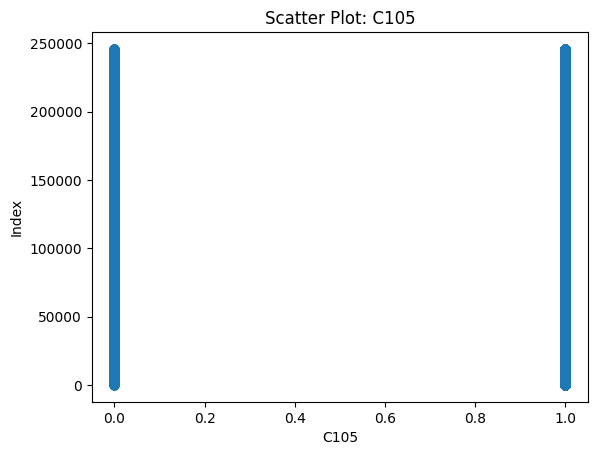

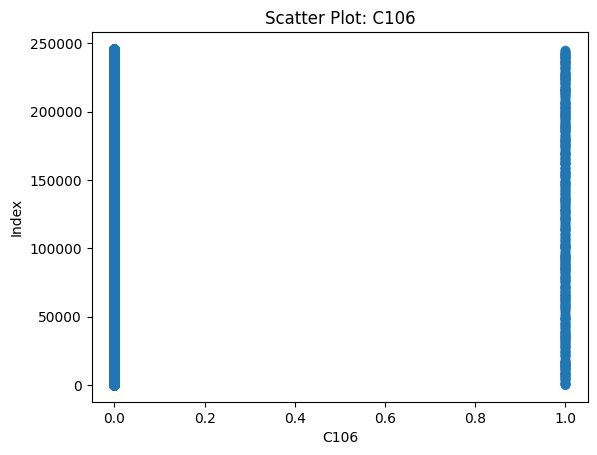

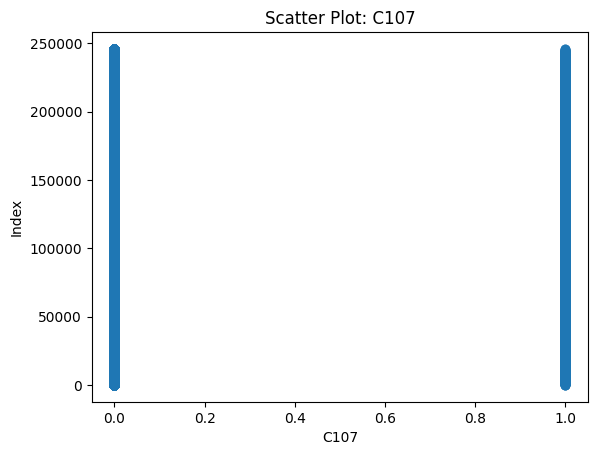

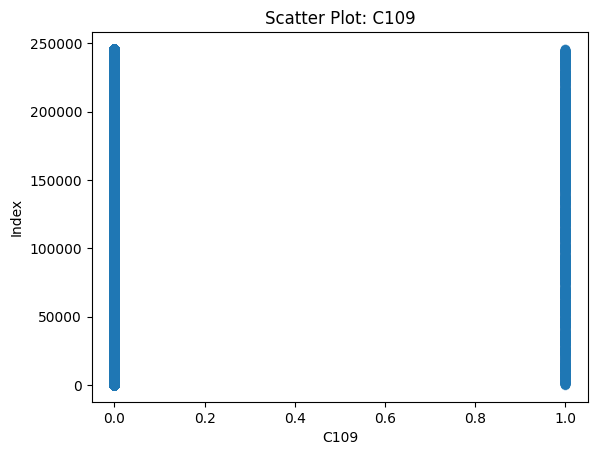

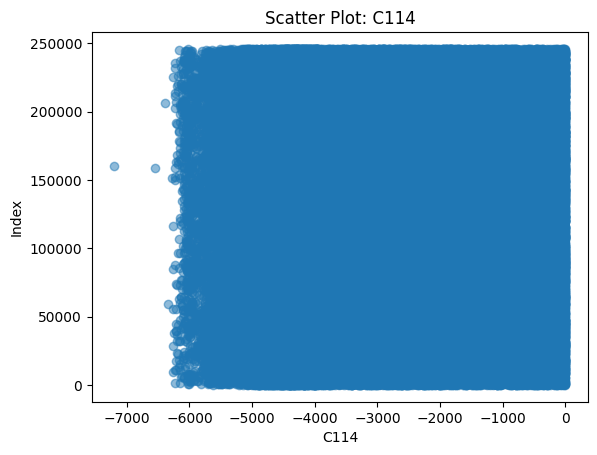

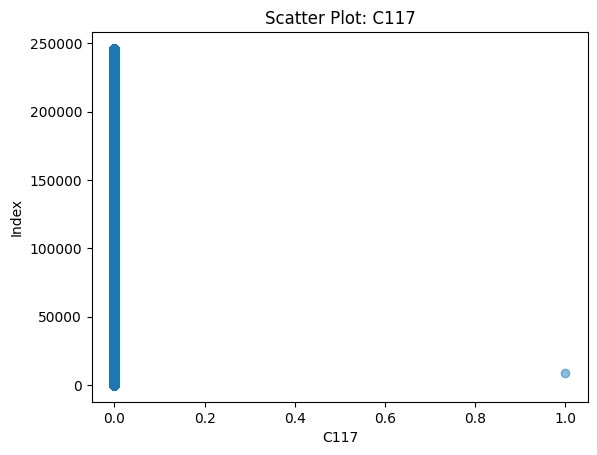

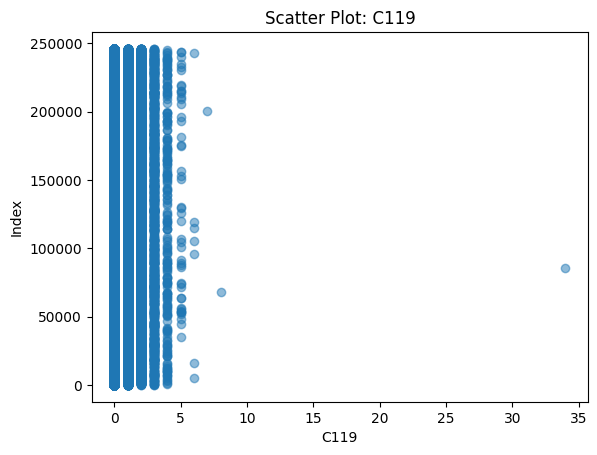

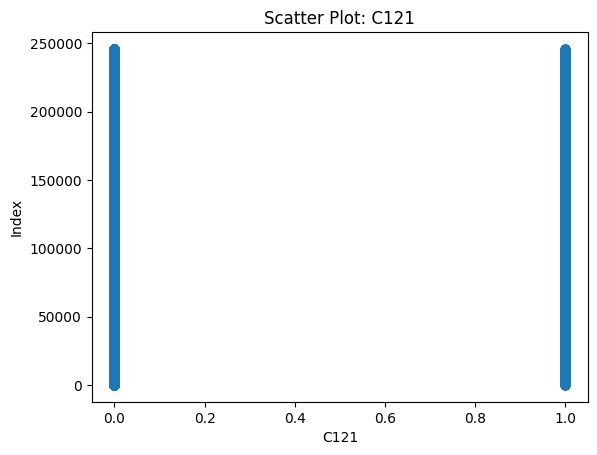

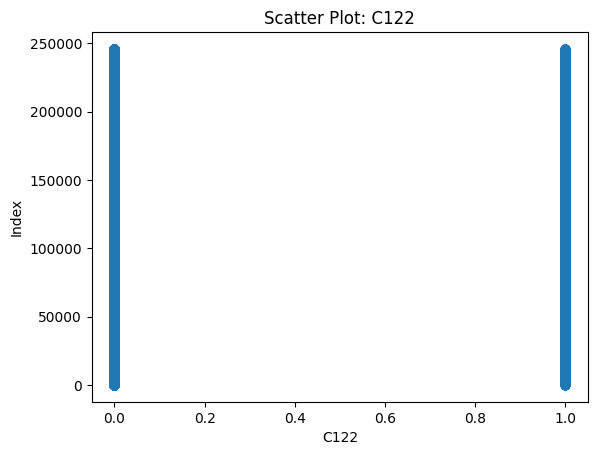

In [35]:
# Plot scatter plots for each numeric column
for column in df_numeric:
    plt.figure()
    plt.scatter(df[column],df.index, alpha=0.5)
    plt.ylabel("Index")
    plt.xlabel(column)
    plt.title("Scatter Plot: " + column)
    plt.show()

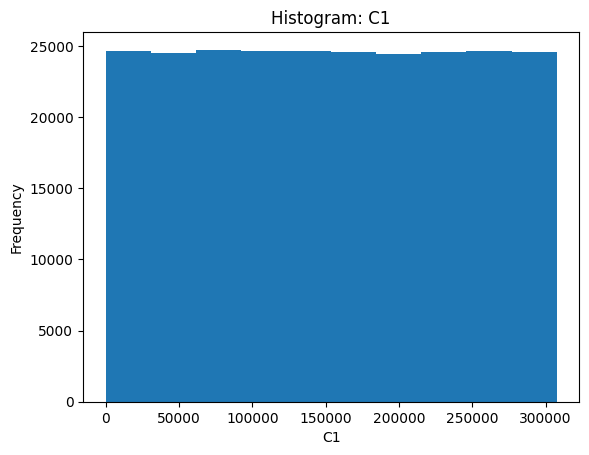

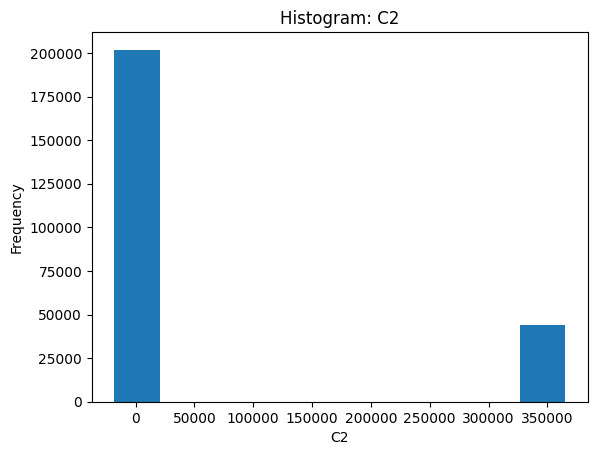

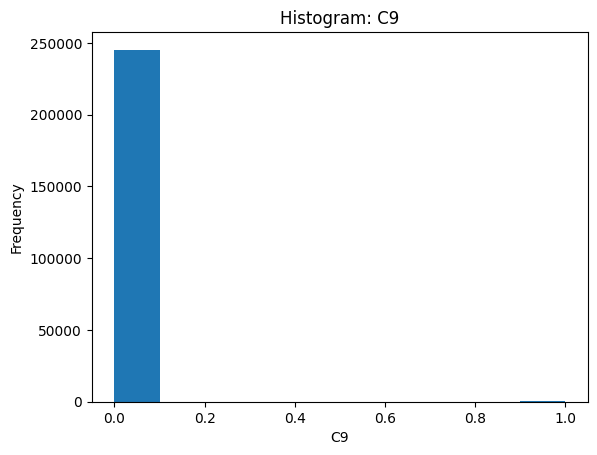

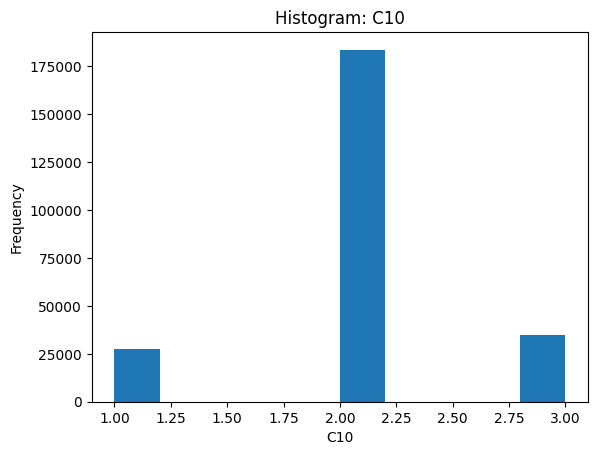

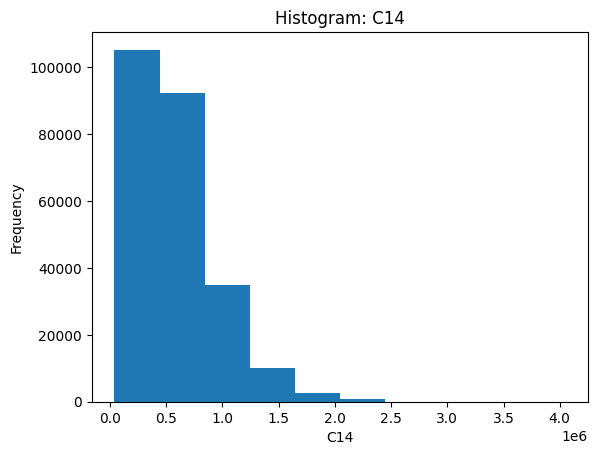

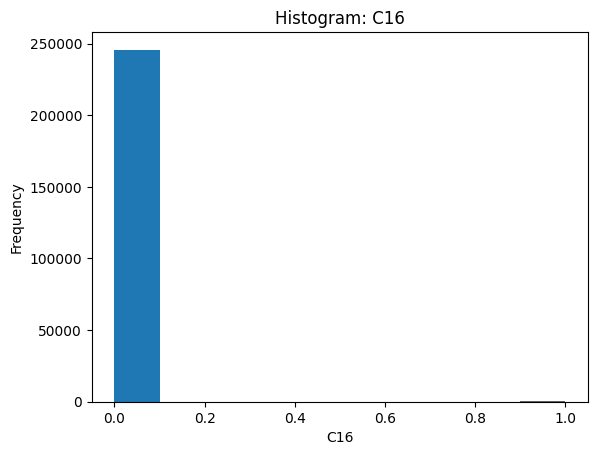

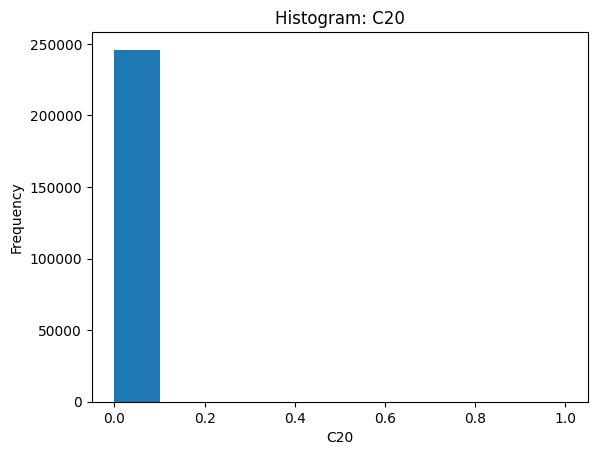

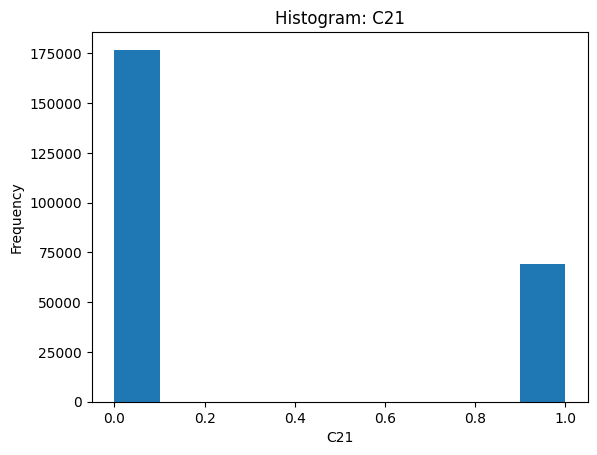

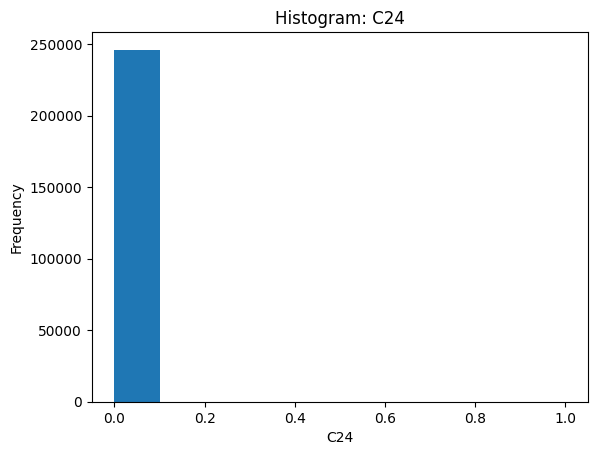

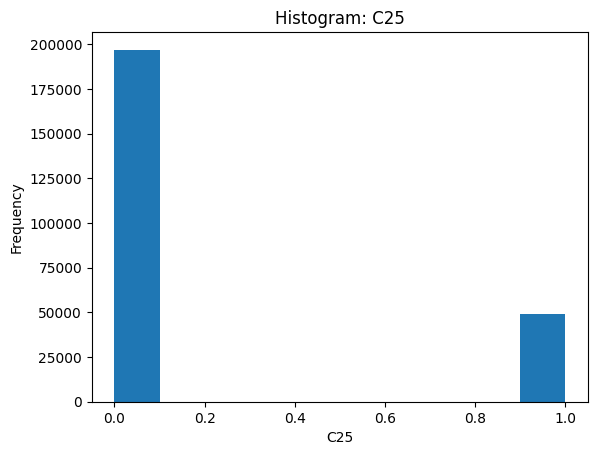

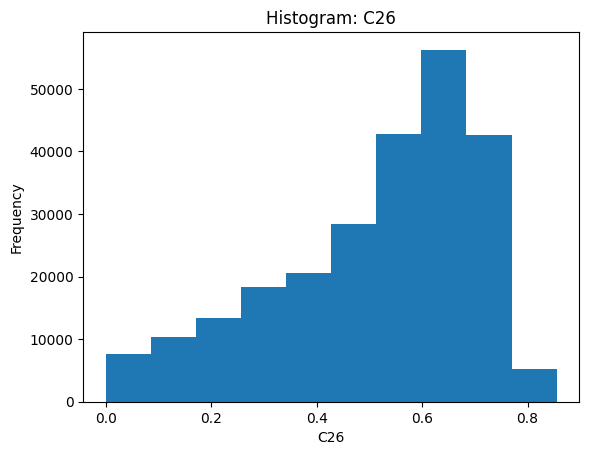

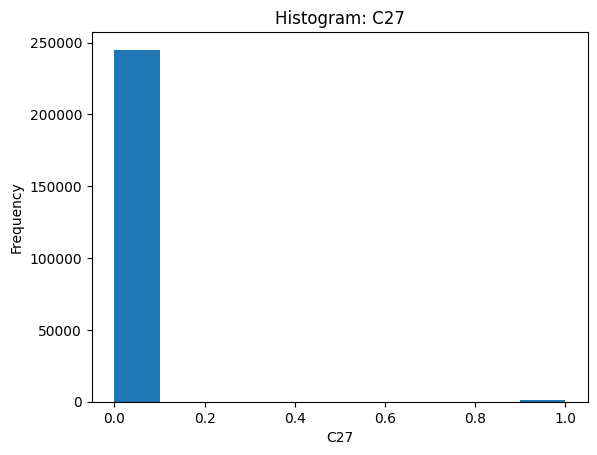

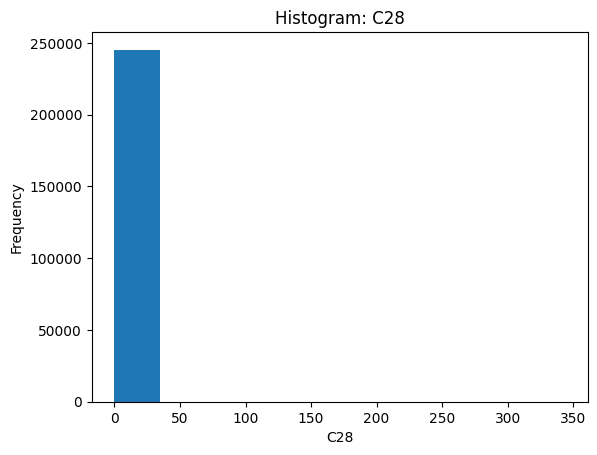

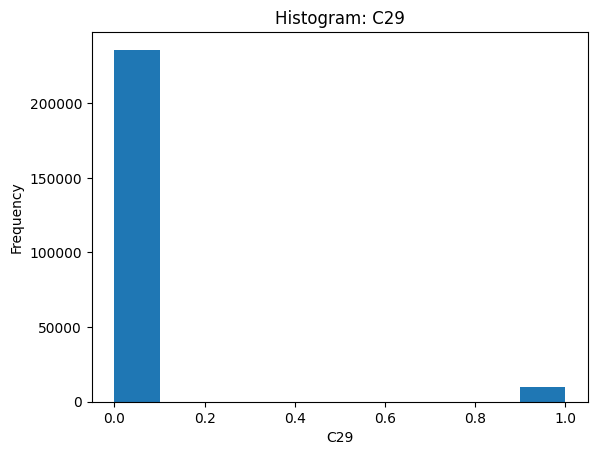

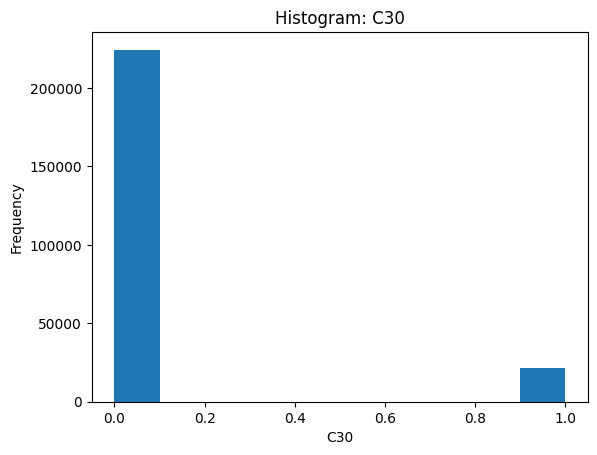

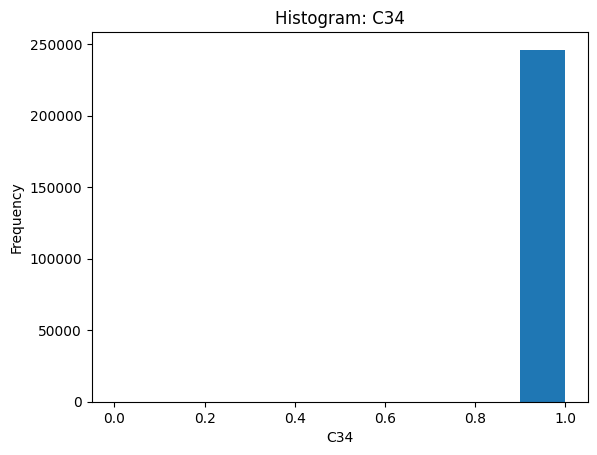

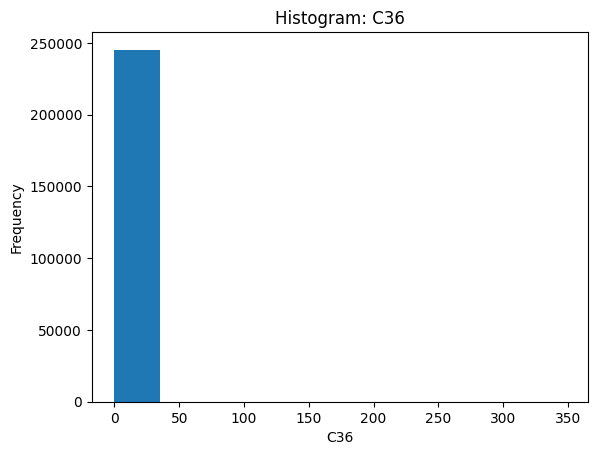

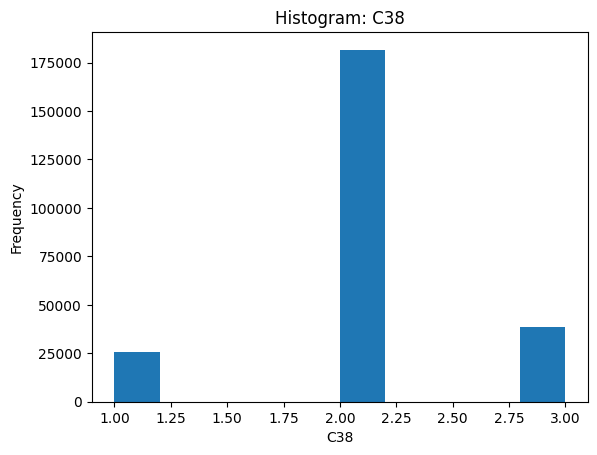

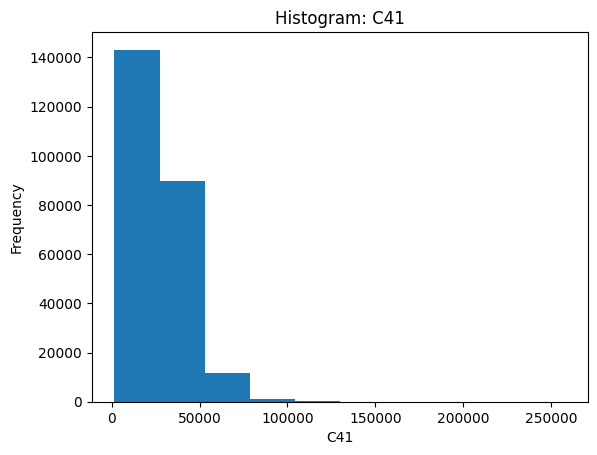

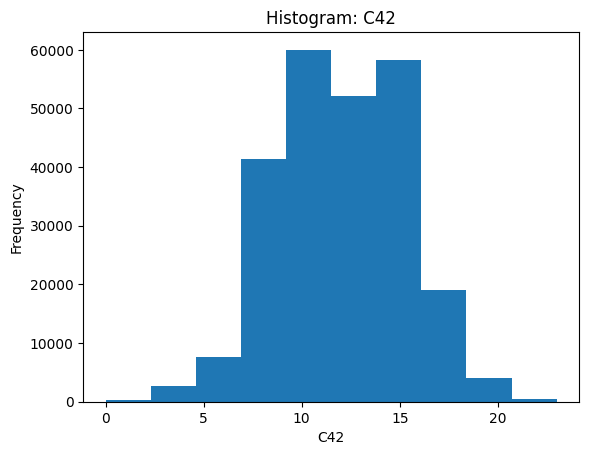

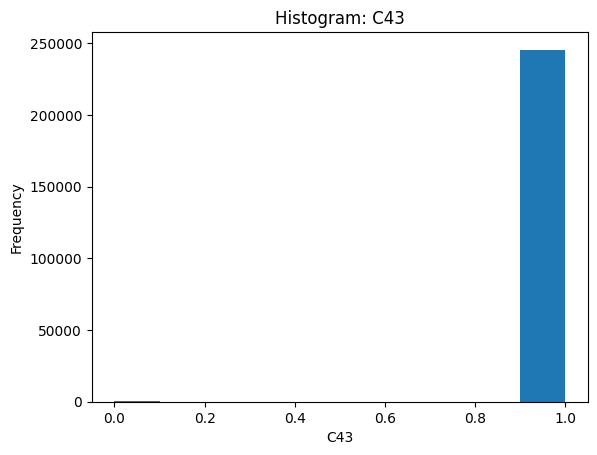

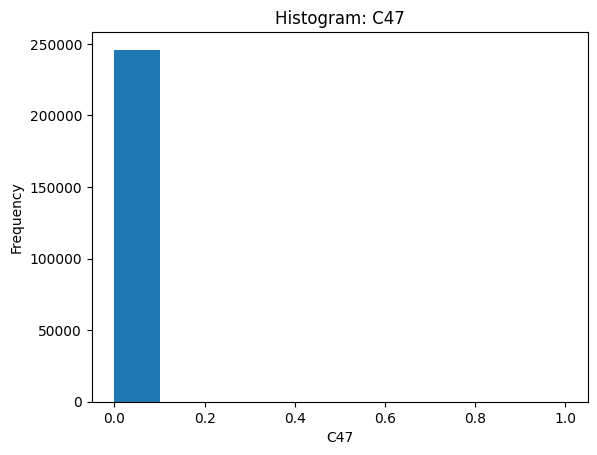

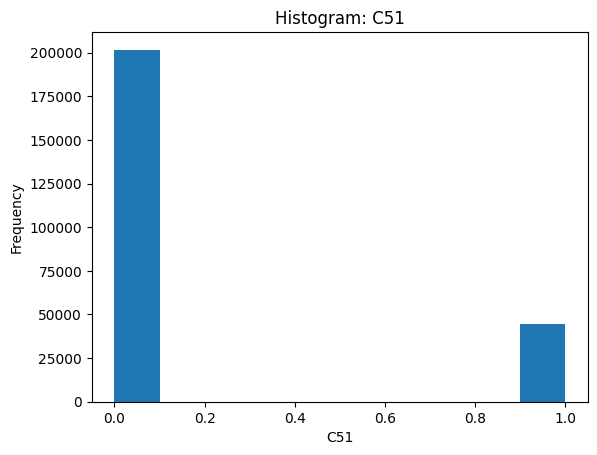

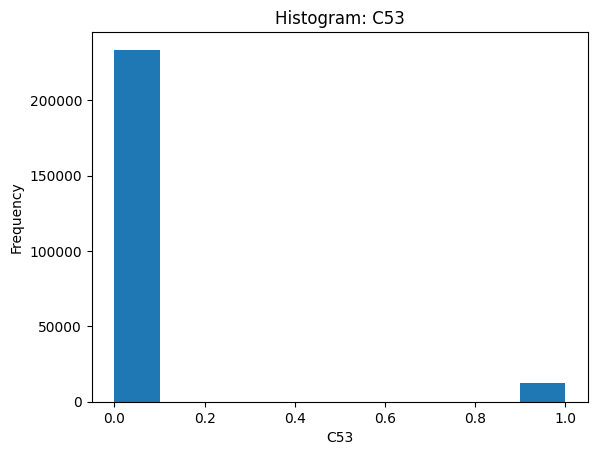

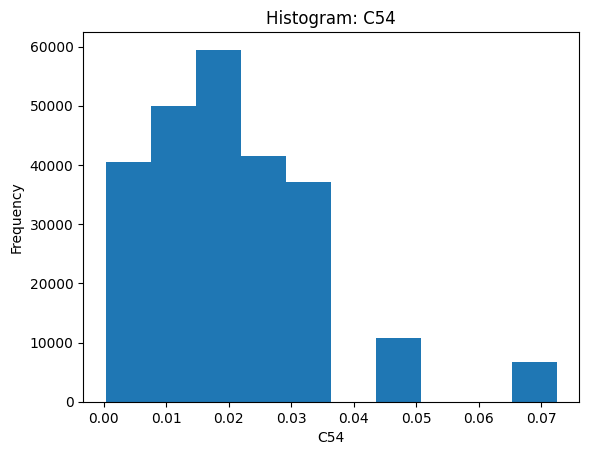

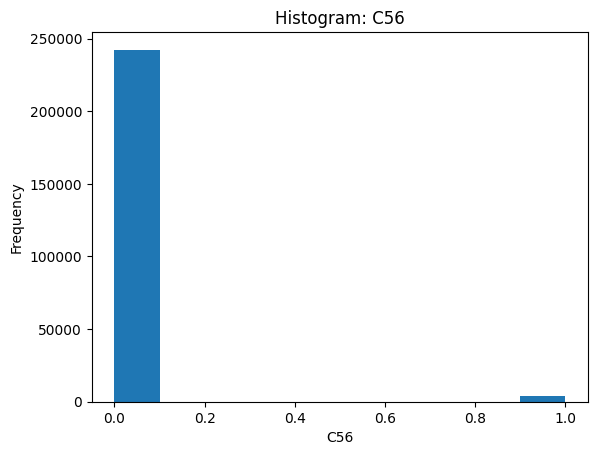

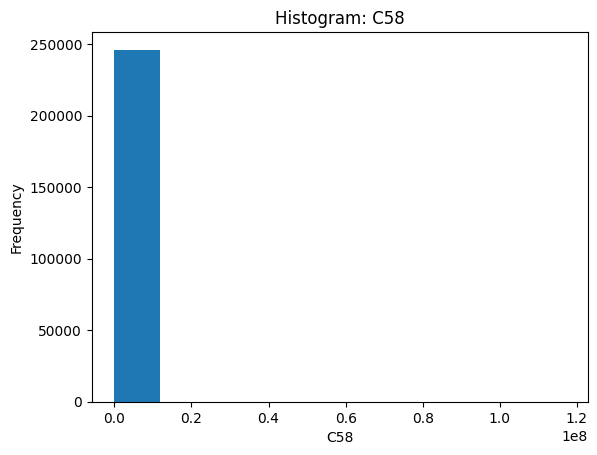

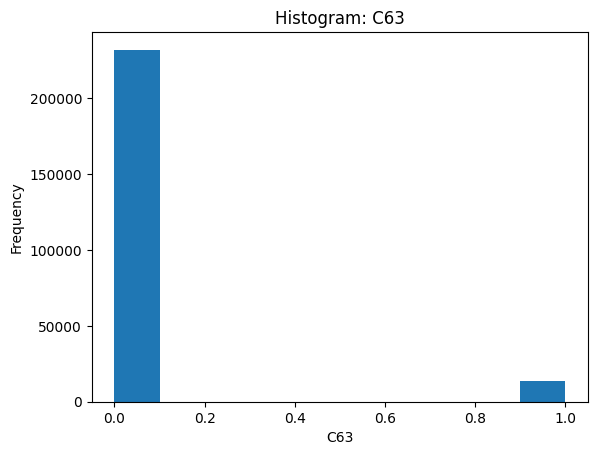

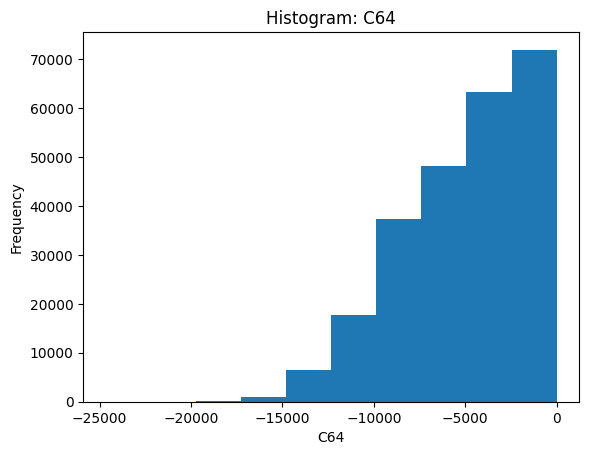

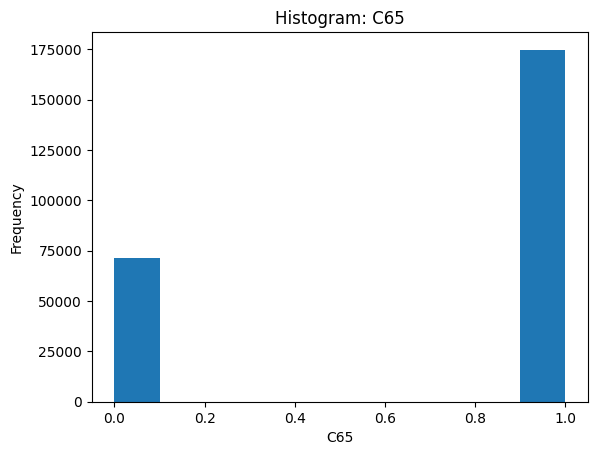

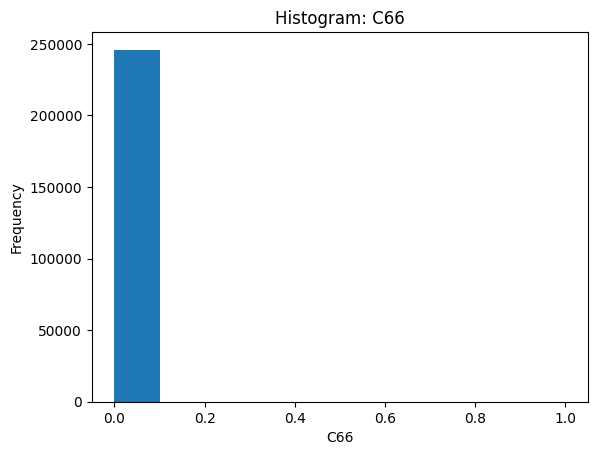

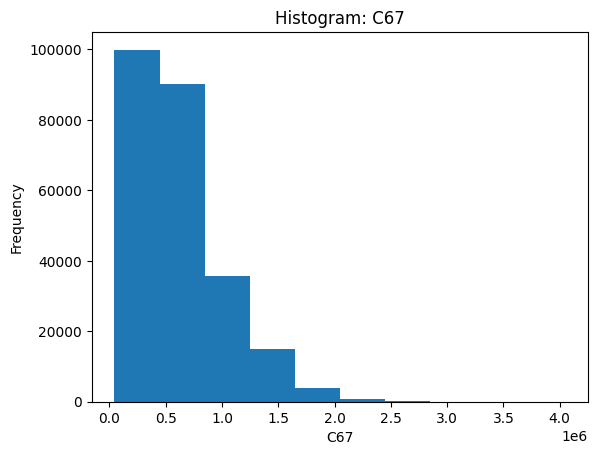

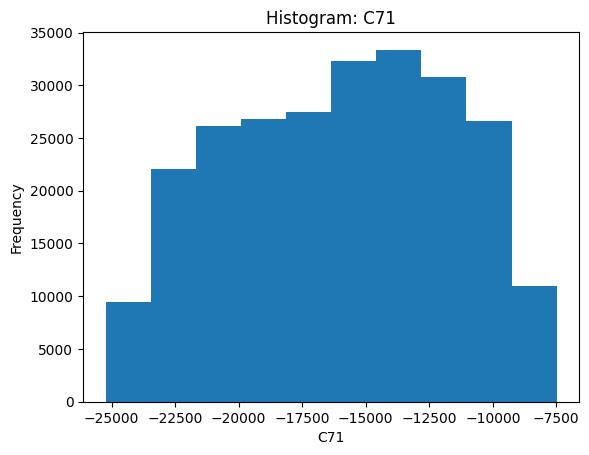

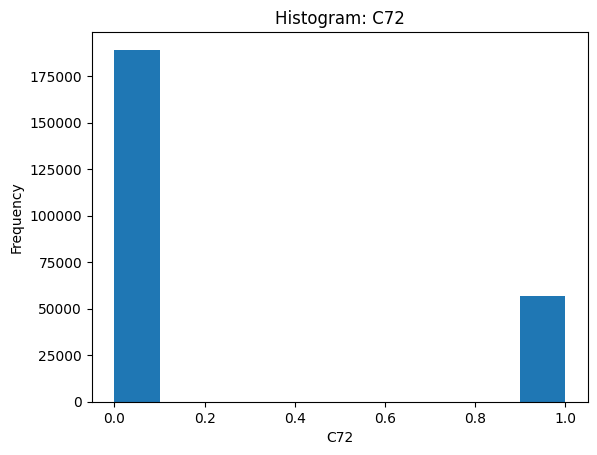

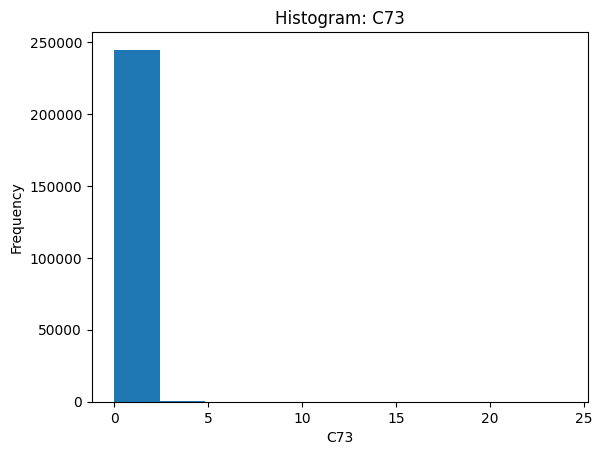

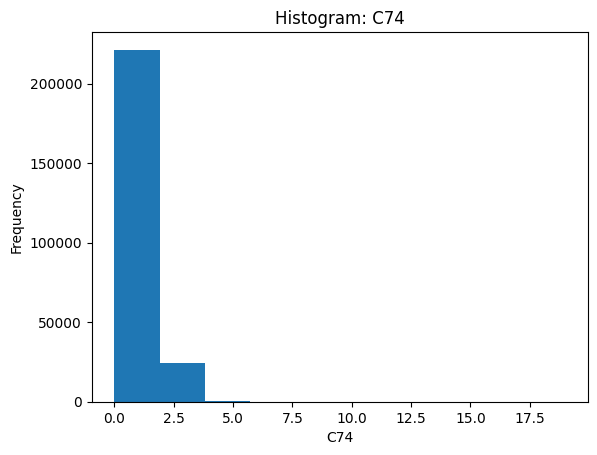

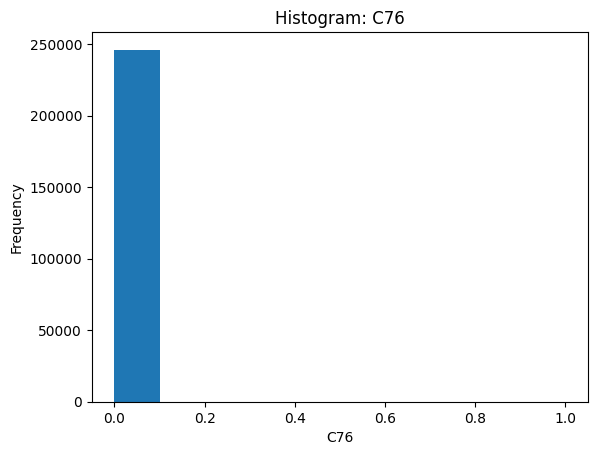

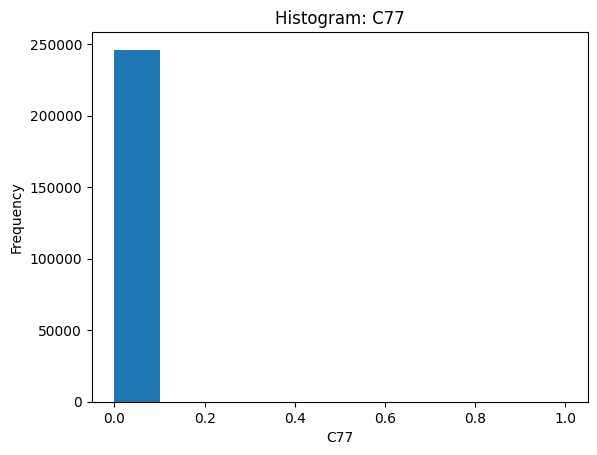

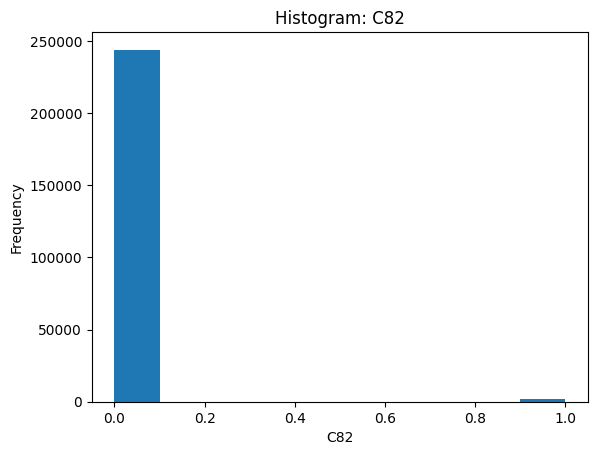

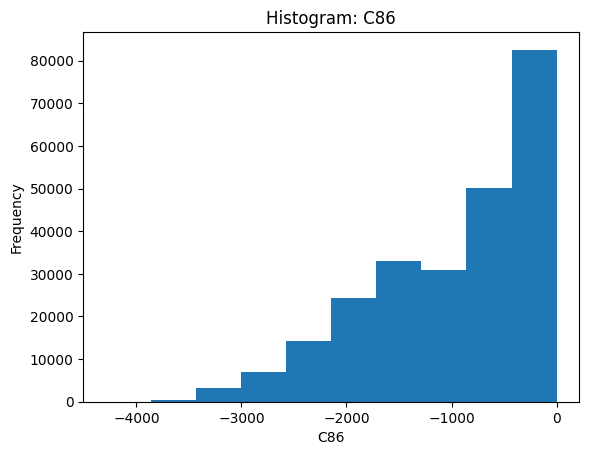

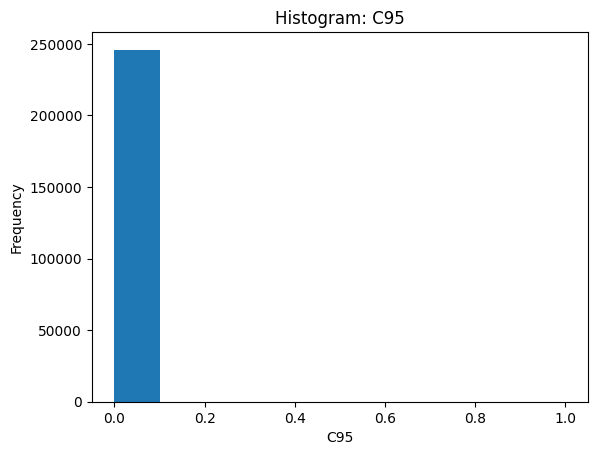

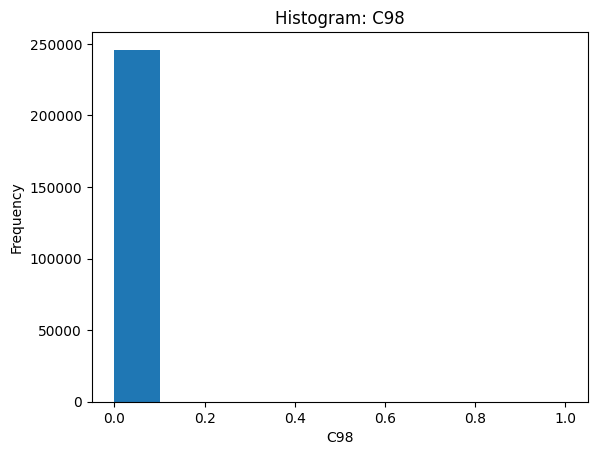

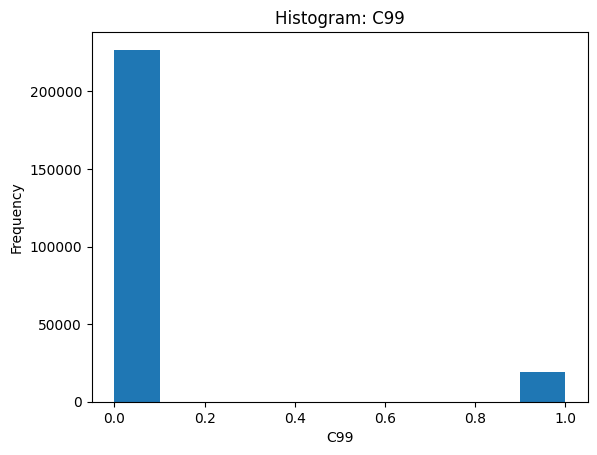

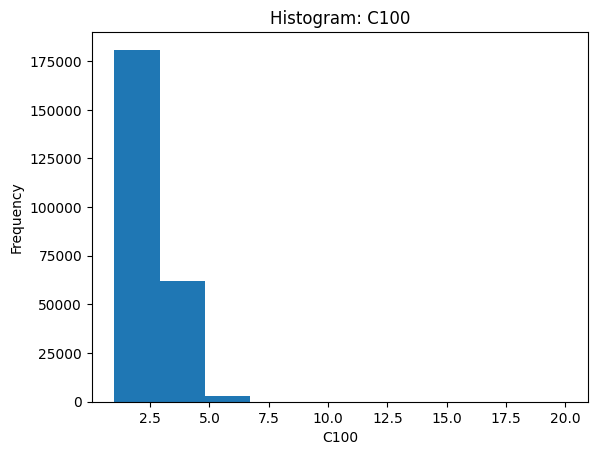

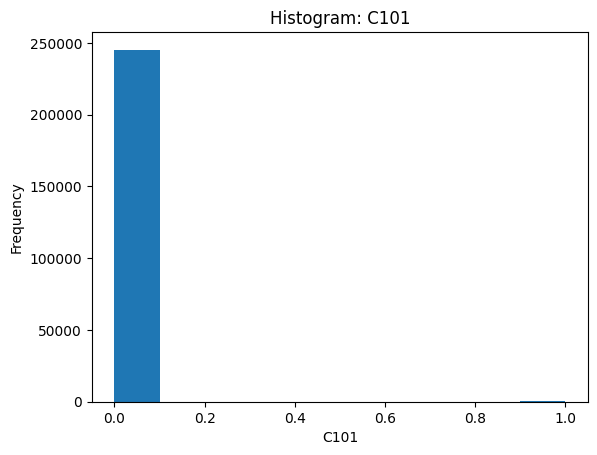

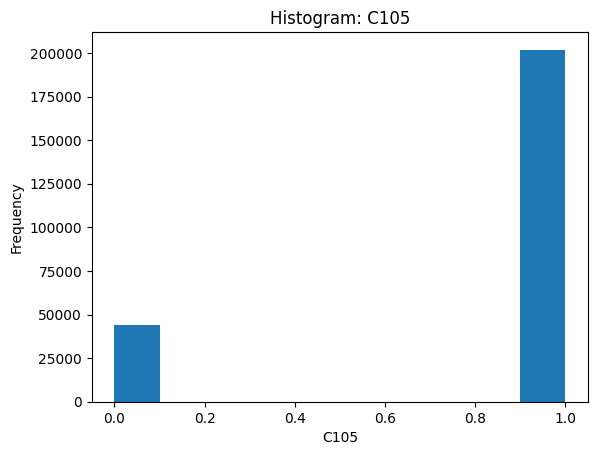

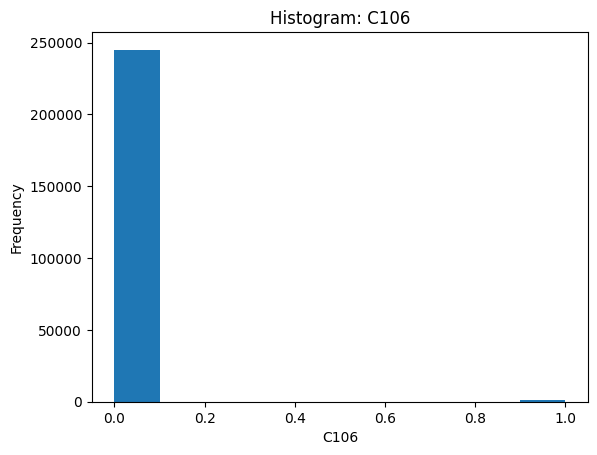

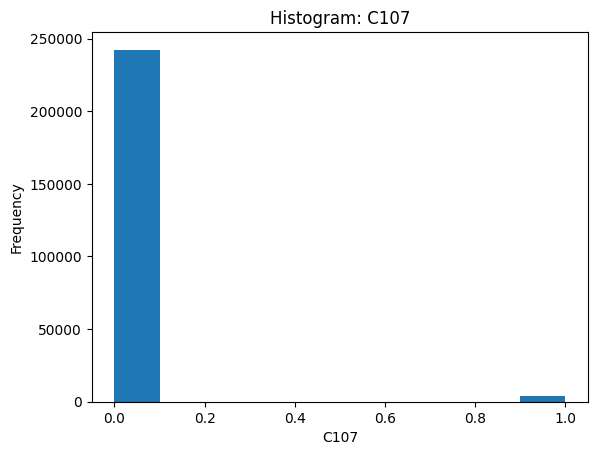

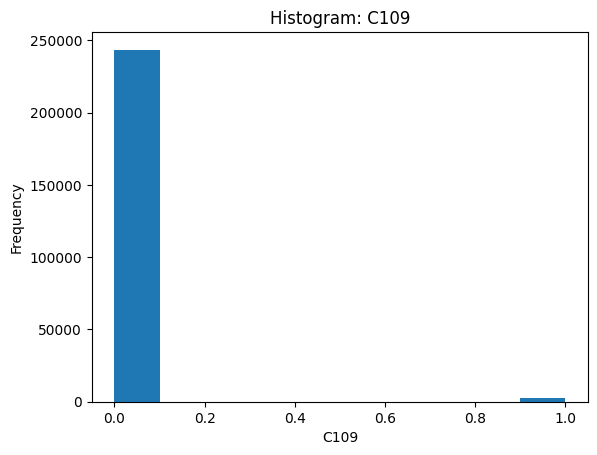

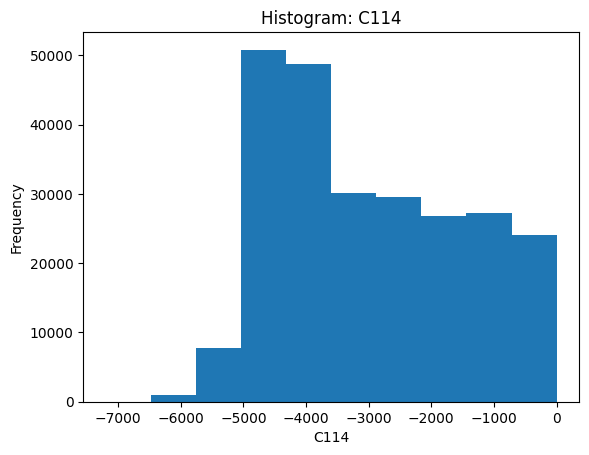

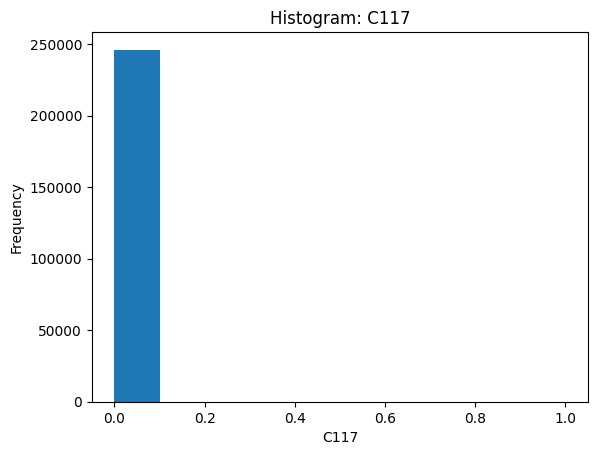

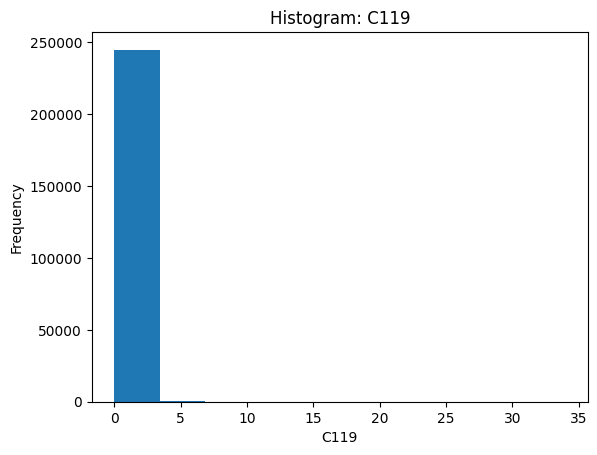

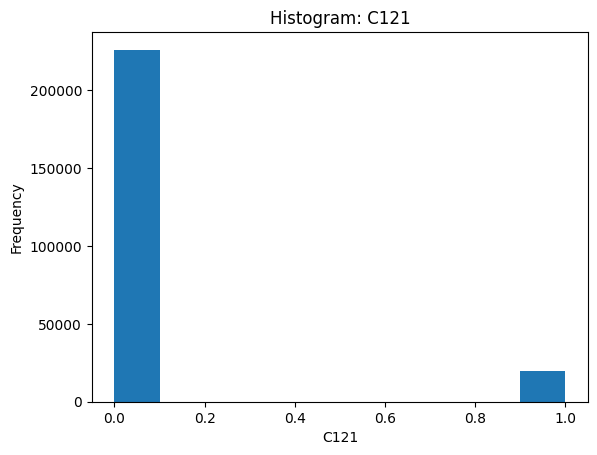

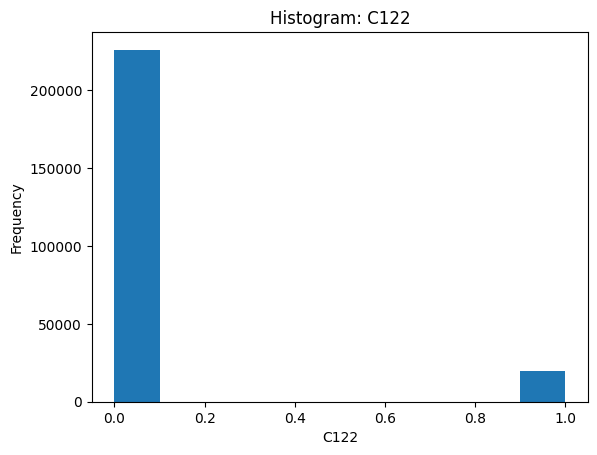

In [36]:
for column in df_numeric:
    plt.figure()
    plt.hist(df[column], bins=10)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title("Histogram: " + column)
    plt.show()

In [17]:
print(df_numeric)

            C1      C2  C9  C10       C14  C16  C20  C21  C24  C25  ...  C101  \
0        69769    -946   0    2  180000.0    0    0    0    0    0  ...     0   
1       236977     -92   0    3  135000.0    0    0    0    0    0  ...     0   
2       168821   -1646   0    2  553500.0    0    0    1    0    0  ...     0   
3        94708   -1651   0    2  391500.0    0    0    1    0    0  ...     0   
4        84556    -977   0    2  225000.0    0    0    0    0    0  ...     0   
...        ...     ...  ..  ...       ...  ...  ...  ...  ...  ...  ...   ...   
246003  248161    -595   0    2  405000.0    0    0    0    0    1  ...     0   
246004  257069   -4334   0    2  225000.0    0    0    0    0    0  ...     0   
246005  154350  365243   0    2  234000.0    0    0    0    0    0  ...     0   
246006  148183  365243   0    3  810000.0    0    0    1    0    0  ...     0   
246007    5167  365243   0    2  877500.0    0    0    1    0    0  ...     0   

        C105  C106  C107  C

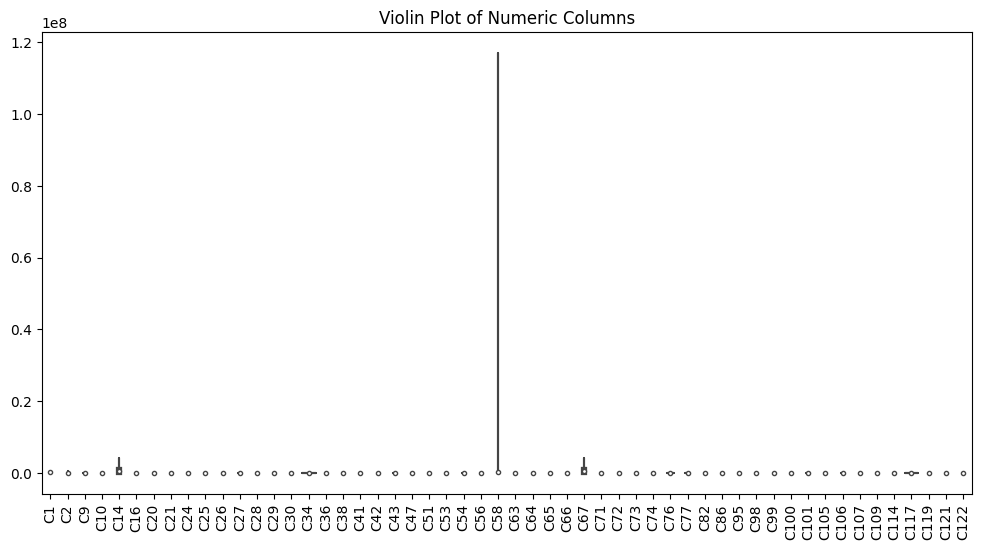

In [37]:
# Create a violin plot for each numeric column
#violin plots show the whole range of the data.
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[df_numeric_columns])
plt.xticks(rotation = 90)
plt.title("Violin Plot of Numeric Columns")
plt.show()


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [18]:
#C58 has an obvious outlier.but do not any missing values.  
df['C58'].isna().any()

False

Is our data balanced or not? 
imbalanced dataset == usually reflects an unequal distribution of classes within a dataset
From graphs we have already understand that our dataset is imbalanced. However, we also choose a label column to check it. C122

In [19]:
dtypes = df.dtypes

continuous = []
binary = []
categorical = [] ##object
label = []

for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) == 2 and set(unique_values) <= set([0, 1]):
        binary.append(col)
    elif dtypes[col] == object:
        categorical.append(col)
    else:
        continuous.append(col)


binary.remove("C122")
label.append("C122")


In [20]:
df.dtypes

C1        int64
C2        int64
C6       object
C7       object
C9        int64
         ...   
C117      int64
C118     object
C119    float64
C121      int64
C122      int64
Length: 65, dtype: object

In [21]:
##this are just numeric columns but it is different from the above df_numric subset (with 54 columns). 
##There are no binary columns and etc. in these continuous sabset
df[continuous] 

,C1,C2,C10,C14,C26,C28,C36,C38,C41,C42,...,C58,C64,C67,C71,C73,C74,C86,C100,C114,C119
0,69769,-946,2,180000.0,0.289573,0.0,0.0,2,13189.5,10,...,90000.0,-6378.0,227520.0,-12298,0.0,2,0.0,4.0,-4670,0.0
1,236977,-92,3,135000.0,0.514261,2.0,2.0,3,13095.0,13,...,90000.0,-1292.0,161730.0,-15375,0.0,0,-509.0,2.0,-1994,0.0
2,168821,-1646,2,553500.0,0.486906,1.0,1.0,3,26307.0,5,...,135000.0,-7951.0,728847.0,-19307,0.0,0,-1474.0,1.0,-2842,0.0
3,94708,-1651,2,391500.0,0.675705,2.0,2.0,2,34636.5,10,...,135000.0,-1033.0,474183.0,-17791,0.0,0,-2016.0,1.0,-1345,0.0
4,84556,-977,2,225000.0,0.154565,0.0,0.0,2,27558.0,5,...,180000.0,-2873.0,254700.0,-8486,0.0,0,-695.0,1.0,-852,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,248161,-595,2,405000.0,0.549668,1.0,1.0,2,20250.0,14,...,135000.0,-6831.0,405000.0,-15374,0.0,1,-379.0,3.0,-4420,0.0
246004,257069,-4334,2,225000.0,0.569702,0.0,0.0,2,21528.0,8,...,157500.0,-8490.0,272520.0,-19035,0.0,0,-374.0,1.0,-2561,0.0
246005,154350,365243,2,234000.0,0.461966,1.0,1.0,2,24493.5,11,...,90000.0,-8975.0,246357.0,-23088,0.0,0,-1689.0,2.0,-4636,0.0
246006,148183,365243,3,810000.0,0.459173,1.0,1.0,3,26901.0,9,...,112500.0,-10162.0,810000.0,-22148,0.0,0,-1329.0,2.0,-4636,0.0


In [22]:
df[continuous].isna().any()

C1      False
C2      False
C10     False
C14      True
C26      True
C28      True
C36      True
C38     False
C41      True
C42     False
C54     False
C58     False
C64     False
C67     False
C71     False
C73      True
C74     False
C86      True
C100     True
C114    False
C119     True
dtype: bool

In [23]:
###filling each column's na values with their median value
df[continuous] = df[continuous].fillna(df[continuous].median())

In [24]:
df[continuous].isna().any()
#proved that, it is succesfully filled na's

C1      False
C2      False
C10     False
C14     False
C26     False
C28     False
C36     False
C38     False
C41     False
C42     False
C54     False
C58     False
C64     False
C67     False
C71     False
C73     False
C74     False
C86     False
C100    False
C114    False
C119    False
dtype: bool

In [25]:
#there is no na values here
df[binary]

,C9,C16,C20,C21,C24,C25,C27,C29,C30,C34,...,C95,C98,C99,C101,C105,C106,C107,C109,C117,C121
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
246004,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
246005,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
246006,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df[categorical]

,C6,C7,C17,C31,C32,C48,C68,C70,C94,C104,C118
0,N,Bus2,Unad,Come,Hout,N,Hign,F,WEDY,Cass,Mard
1,Y,Othr,Unad,Come,Hout,Y,Secl,M,TUEY,Cass,Mard
2,N,Bus3,Spor,Worg,Hout,Y,Secl,M,TUEY,Cass,Sind
3,N,Bus3,Unad,Come,Hout,N,Secl,M,TUEY,Cass,Sind
4,N,Rest,Unad,Come,Hout,Y,Incr,F,MONY,Cass,Sind
...,...,...,...,...,...,...,...,...,...,...,...
246003,N,Bus3,Unad,Come,Hout,Y,Secl,F,MONY,Revs,Mard
246004,N,Mede,Unad,Stat,Hout,N,Secl,F,MONY,Cass,Sind
246005,N,XNAA,Unad,Penr,Hout,N,Secl,F,SUNY,Cass,Cive
246006,N,XNAA,Chin,Penr,Hout,Y,Secl,F,WEDY,Cass,Mard


In [27]:
##fill missing values with the mode value for each column, regardless of whether they are categorical or numeric.
df[categorical] = df[categorical].fillna(df[categorical].mode().iloc[0])

In [28]:
df[label]

,C122
0,0
1,0
2,1
3,1
4,0
...,...
246003,0
246004,0
246005,0
246006,1


In [29]:
object_columns = df.select_dtypes(include = ['object']).columns

for col in object_columns:
    unique_values = df[col].value_counts()
    print(f"{col}---{len(unique_values)}")

###to count the number of unique categories in that column. 

C6---2
C7---51
C17---7
C31---8
C32---6
C48---2
C68---5
C70---3
C94---7
C104---2
C118---6


In [30]:
for column in df.columns:

    unique_values = df[column].unique()
    if len(unique_values) == 2:
        binary = {unique_values[0]: 0, unique_values[1]: 1}
        df[column] = df[column].replace(binary)
  
#We made the categories in the columns of object type containing 2 categories into binary, with the help of the for loop, we checked the A1 and A6 columns below by running
print(df[['C1', 'C6']].head())

       C1  C6
0   69769   0
1  236977   1
2  168821   0
3   94708   0
4   84556   0


In [31]:
#3 categorical columns contained 2 objects. We made them binary.
#After these operations, when we call the categorical list, 8 columns are returned.
#Before eliminating these, if we have a data that is half empty from the remaining columns, let's remove this data from the set.
column_cat = df.select_dtypes(include='object').columns
print(column_cat)

Index(['C7', 'C17', 'C31', 'C32', 'C68', 'C70', 'C94', 'C118'], dtype='object')


In [32]:
df[column_cat]

,C7,C17,C31,C32,C68,C70,C94,C118
0,Bus2,Unad,Come,Hout,Hign,F,WEDY,Mard
1,Othr,Unad,Come,Hout,Secl,M,TUEY,Mard
2,Bus3,Spor,Worg,Hout,Secl,M,TUEY,Sind
3,Bus3,Unad,Come,Hout,Secl,M,TUEY,Sind
4,Rest,Unad,Come,Hout,Incr,F,MONY,Sind
...,...,...,...,...,...,...,...,...
246003,Bus3,Unad,Come,Hout,Secl,F,MONY,Mard
246004,Mede,Unad,Stat,Hout,Secl,F,MONY,Sind
246005,XNAA,Unad,Penr,Hout,Secl,F,SUNY,Cive
246006,XNAA,Chin,Penr,Hout,Secl,F,WEDY,Mard


In [33]:
df.isna().sum()

C1      0
C2      0
C6      0
C7      0
C9      0
       ..
C117    0
C118    0
C119    0
C121    0
C122    0
Length: 65, dtype: int64

Label encoding is a process of converting categorical variables into numeric labels

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
##Applying label encoding to the columns in the categorical list.
le = LabelEncoder()
remove_cols = []

for col in categorical:
    df[col] = le.fit_transform(df[col])

for col in categorical:
    if len(df[col].unique()) == 2:
        remove_cols.append(col)

# Convert binary to a list
binary = []

for col in remove_cols:
    categorical.remove(col)
    binary.append(col)


In [36]:
#to check it ✔️
df[categorical]

,C7,C17,C31,C32,C68,C70,C94,C118
0,4,6,1,1,1,0,6,1
1,30,6,1,1,4,1,5,1
2,5,5,7,1,4,1,5,3
3,5,6,1,1,4,1,5,3
4,35,6,1,1,2,0,1,3
...,...,...,...,...,...,...,...,...
246003,5,6,1,1,4,0,1,1
246004,27,6,4,1,4,0,1,3
246005,50,6,3,1,4,0,3,0
246006,50,0,3,1,4,0,6,1


In [37]:
#now all data is numeric
df

,C1,C2,C6,C7,C9,C10,C14,C16,C17,C20,...,C105,C106,C107,C109,C114,C117,C118,C119,C121,C122
0,69769,-946,0,4,0,2,180000.0,0,6,0,...,0,0,0,0,-4670,0,1,0.0,0,0
1,236977,-92,1,30,0,3,135000.0,0,6,0,...,0,0,0,0,-1994,0,1,0.0,0,0
2,168821,-1646,0,5,0,2,553500.0,0,5,0,...,0,0,0,0,-2842,0,3,0.0,0,1
3,94708,-1651,0,5,0,2,391500.0,0,6,0,...,0,0,0,0,-1345,0,3,0.0,0,1
4,84556,-977,0,35,0,2,225000.0,0,6,0,...,0,0,0,0,-852,0,3,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,248161,-595,0,5,0,2,405000.0,0,6,0,...,0,0,0,0,-4420,0,1,0.0,0,0
246004,257069,-4334,0,27,0,2,225000.0,0,6,0,...,0,0,0,0,-2561,0,3,0.0,0,0
246005,154350,365243,0,50,0,2,234000.0,0,6,0,...,1,0,0,0,-4636,0,0,0.0,0,0
246006,148183,365243,0,50,0,3,810000.0,0,0,0,...,1,0,0,0,-4636,0,1,0.0,0,1


In [197]:
for column in df.columns:
    # Get value counts for the column
    value_counts = df[column].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart for {column}')
    plt.axis('equal')
    plt.show()

KeyboardInterrupt: 

In [38]:
df["C122"].value_counts()
#it also calculates the relative frequencies of each unique value by setting the normalize parameter to True.
df["C122"].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: C122, dtype: float64

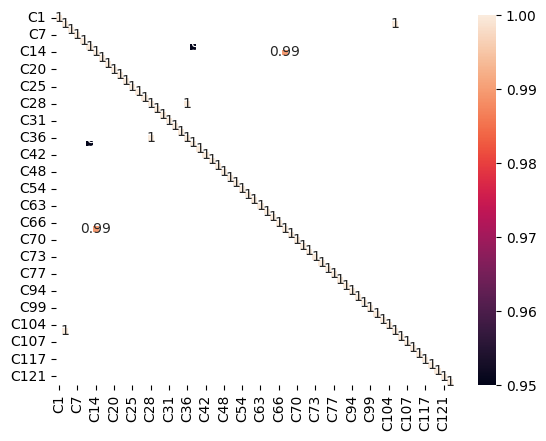

In [39]:
corr_matrix = df.corr().round(2)

# 0.9'dan fazla korelasyon içeren sütunları filtreledik
corr_filtered = corr_matrix[(corr_matrix > 0.90) | (corr_matrix < -0.90)]

sns.heatmap(corr_filtered, annot=True)
plt.show()

In [40]:
high_corr_pairs = []
threshold = 0.9
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if corr_matrix.iloc[i,j] >= threshold:
            high_corr_pairs.append((df.columns[i], df.columns[j]))
#korelasyonu 0.9'dan fazla olan kolonlar

In [41]:
high_corr_pairs
##### korelasyonu 0.9 dan fazla olan sütun ikilileri

[('C2', 'C105'), ('C10', 'C38'), ('C14', 'C67'), ('C28', 'C36')]

In [42]:
for pair in high_corr_pairs:
    if pair[0] in df.columns and pair[1] in df.columns:
        if pair[0] in continuous:
            df = df.drop(pair[1], axis=1)
        elif pair[1] in continuous:
            df = df.drop(pair[0], axis=1)
        else:
            vif_pair_0 = variance_inflation_factor(df.values, df.columns.get_loc(pair[0]))
            vif_pair_1 = variance_inflation_factor(df.values, df.columns.get_loc(pair[1]))
            if vif_pair_0 >= vif_pair_1:
                df = df.drop(pair[1], axis=1)
            else:
                df = df.drop(pair[0], axis=1)

REGRESSION MODEL ++++++++++++++++++++++++++++++++++++++

In [44]:
df

,C1,C2,C6,C7,C9,C10,C14,C16,C17,C20,...,C104,C106,C107,C109,C114,C117,C118,C119,C121,C122
0,69769,-946,0,4,0,2,180000.0,0,6,0,...,0,0,0,0,-4670,0,1,0.0,0,0
1,236977,-92,1,30,0,3,135000.0,0,6,0,...,0,0,0,0,-1994,0,1,0.0,0,0
2,168821,-1646,0,5,0,2,553500.0,0,5,0,...,0,0,0,0,-2842,0,3,0.0,0,1
3,94708,-1651,0,5,0,2,391500.0,0,6,0,...,0,0,0,0,-1345,0,3,0.0,0,1
4,84556,-977,0,35,0,2,225000.0,0,6,0,...,0,0,0,0,-852,0,3,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,248161,-595,0,5,0,2,405000.0,0,6,0,...,1,0,0,0,-4420,0,1,0.0,0,0
246004,257069,-4334,0,27,0,2,225000.0,0,6,0,...,0,0,0,0,-2561,0,3,0.0,0,0
246005,154350,365243,0,50,0,2,234000.0,0,6,0,...,0,0,0,0,-4636,0,0,0.0,0,0
246006,148183,365243,0,50,0,3,810000.0,0,0,0,...,0,0,0,0,-4636,0,1,0.0,0,1


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

In [100]:
X = df.drop('C122', axis=1)  #target_variable
y = df['C122']

##ı sample the dataset 1,4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# the regression model
model1 = LinearRegression()

# Fit the model on the training data
model1.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model1.predict(X_test)

In [101]:
model1

LinearRegression()

In [49]:
#this is the array of predicted values for the testing data
y_pred

array([0.01356585, 0.12545849, 0.12052229, ..., 0.02805784, 0.03610599,
       0.2286861 ])

In [51]:
## for analyze the performance of the regression model and evaluate its accuracy
## comparasion between  (y_pred) with the actual target values (y_test)
mse = mean_squared_error(y_test, y_pred) #The MSE quantifies the average squared difference between the predicted and actual values of the target variable. Lower the better
print("Mean Squared Error (MSE):", mse)  # higher value indicates a better fit

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 0.07110334149049541
R-squared Score: 0.03878898150559462


According to these results linear regression is not suitable for this dataset and does not give sufficient results. These below examinations do not mean much in this case

In [102]:
results = pd.DataFrame({'Feature': X_train.columns, 'Estimator': model1.coef_})
print(results)

   Feature     Estimator
0       C1 -2.825181e-09
1       C2  3.145904e-09
2       C6 -1.924174e-02
3       C7 -1.160475e-04
4       C9 -3.457644e-02
5      C10  1.087771e-02
6      C14 -2.621776e-08
7      C16 -3.300655e-02
8      C17  8.846796e-04
9      C20  3.677839e-02
10     C21 -7.063883e-03
11     C24 -3.698162e-02
12     C25  1.266222e-02
13     C26 -1.912030e-01
14     C27 -2.031912e-02
15     C28 -1.418382e-04
16     C29 -1.561064e-02
17     C30  2.305250e-02
18     C31  1.221408e-03
19     C32  1.604653e-03
20     C34 -4.963794e-02
21     C41  6.865628e-07
22     C42  6.223084e-05
23     C43  2.285709e-02
24     C47 -6.375814e-02
25     C48  2.293738e-03
26     C51  5.347162e-03
27     C53  1.506612e-02
28     C54  2.587528e-01
29     C56 -2.392114e-02
30     C58  7.079801e-09
31     C63  4.790348e-05
32     C64  1.019191e-06
33     C65 -2.678700e-02
34     C66 -2.012081e-03
35     C68  7.798600e-03
36     C70  3.212059e-02
37     C71  2.642153e-06
38     C72 -2.497016e-03


In [56]:
results['Magnitude'] = abs(results['Estimator'])  # Add a new column for magnitude
results = results.sort_values(by='Magnitude', ascending=False)  # Sort the dataframe by magnitude
results

,Feature,Estimator,Magnitude
28,C54,2.587528e-01,2.587528e-01
13,C26,-1.912030e-01,1.912030e-01
42,C77,1.841980e-01,1.841980e-01
24,C47,-6.375814e-02,6.375814e-02
20,C34,-4.963794e-02,4.963794e-02
41,C76,-4.514917e-02,4.514917e-02
11,C24,-3.698162e-02,3.698162e-02
43,C82,-3.696602e-02,3.696602e-02
9,C20,3.677839e-02,3.677839e-02
4,C9,-3.457644e-02,3.457644e-02


from that we understand that between C122 and C54 colums, there is a strong (compared with other columns) positive rrelationship.

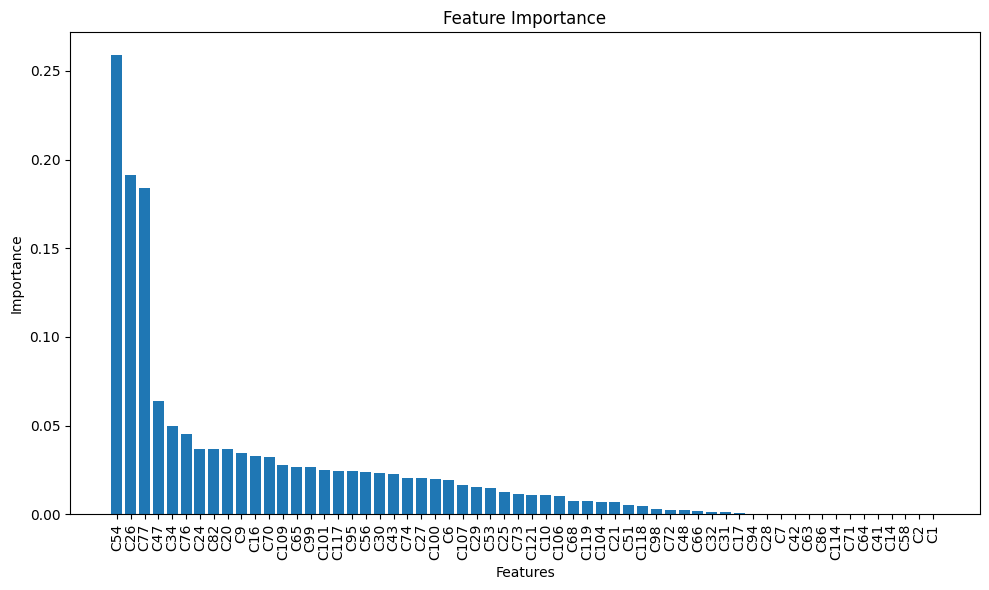

In [103]:
# Assuming 'results' dataframe contains the estimators and other information
feature_importance = results['Estimator'].abs()  # Calculate the feature importance based on absolute estimators

# Sort the feature importance in descending order
sorted_indices = feature_importance.argsort()[::-1]
sorted_importance = feature_importance.iloc[sorted_indices]
sorted_features = results['Feature'].iloc[sorted_indices]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance)
plt.xticks(range(len(sorted_importance)), sorted_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


since this dataset is imbalance ı want to apply under sampling then ı will use logistic regression for just binary columns and regression for continuous target variables again.

In [63]:
pip install imbalanced-learn

     -------------------------------------- 226.0/226.0 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [104]:
from imblearn.under_sampling import RandomUnderSampler

In [140]:
rus = RandomUnderSampler(random_state=42)
x_u, y_u = rus.fit_resample(X, y)

# Check the class distribution after under-sampling
unique, counts = np.unique(y_u, return_counts=True)
print("Class Distribution after Under-sampling:")
for label, count in zip(unique, counts):
    print("Class", label, ": Count", count)

## the dataset now has an equal number of instances for both classes, which helps address the class imbalance issue.

Class Distribution after Under-sampling:
Class 0 : Count 19860
Class 1 : Count 19860


In [141]:
##sampled from undersampled data
x_trainu, x_testu, y_trainu, y_testu = train_test_split(x_u, y_u, test_size=0.2, random_state=42)

In [142]:
# the regression model
model2 = LinearRegression()

# Fit the model on the training data
model2.fit(x_trainu, y_trainu)
# Make predictions on the testing data
y_predu = model2.predict(x_testu)

In [143]:
y_predu

array([0.60356273, 0.42511001, 0.43704352, ..., 0.42144503, 0.54205405,
       0.38837718])

In [86]:
mseu = mean_squared_error(y_testu, y_predu) #The MSE quantifies the average squared difference between the predicted and actual values of the target variable. Lower the better
print("Mean Squared Error (MSE):", mseu)  # higher value indicates a better fit

# Calculate R-squared score
r2u = r2_score(y_testu, y_predu)
print("R-squared Score:", r2u)

Mean Squared Error (MSE): 0.22028505559708583
R-squared Score: 0.11885977761165667


In [110]:
#mean squared value change
print(mse)
print(mseu)
print(mse/mseu*100)

0.07110334149049541
0.22028505559708583
32.277877996657


In [111]:
# r-squared value change
print(r2)
print(r2u)
print(r2/r2u*100)

0.03878898150559462
0.11885977761165667
32.634236984968545


mean squared value gets close to 1 so, this means difference between the predicted and actual values of the target variable getting larger. It is something we do not want but this result can be caused by undersampling.Since, R-squared is getting large which indicate better fit. Our model's accuracy is getting better??. Linear regression is more suitable for continuous values so ı will sample just that colums and do the regression for the third time.

In [112]:
subset_columns = df.columns.difference(['C36', 'C38', 'C67'])
x_trainu2, x_testu2, y_trainu2, y_testu2 = train_test_split(df[subset_columns], y, test_size=0.2, random_state=42)

In [113]:
# the regression model
model3 = LinearRegression()

# Fit the model on the training data
model3.fit(x_trainu2, y_trainu2)
# Make predictions on the testing data
y_predu2 = model3.predict(x_testu2)

In [114]:
y_predu2

array([-1.34214361e-10,  8.59217321e-11, -2.21229676e-11, ...,
       -1.15560837e-10, -6.84417372e-12, -7.00352740e-11])

In [115]:
mseu2 = mean_squared_error(y_testu2, y_predu2) #The MSE quantifies the average squared difference between the predicted and actual values of the target variable. Lower the better
print("Mean Squared Error (MSE):", mseu2)  # higher value indicates a better fit

# Calculate R-squared score
r2u2 = r2_score(y_testu2, y_predu2)
print("R-squared Score:", r2u2)

Mean Squared Error (MSE): 6.0423012592809226e-21
R-squared Score: 1.0


In [116]:
#mean squared value change
print(mse)
print(mseu)
print(mseu2)
print(mse/mseu*100)

0.07110334149049541
0.22028505559708583
6.0423012592809226e-21
32.277877996657


In [117]:
# r-squared value change
print(r2)
print(r2u)
print(r2u2)
print(r2/r2u*100)

0.03878898150559462
0.11885977761165667
1.0
32.634236984968545


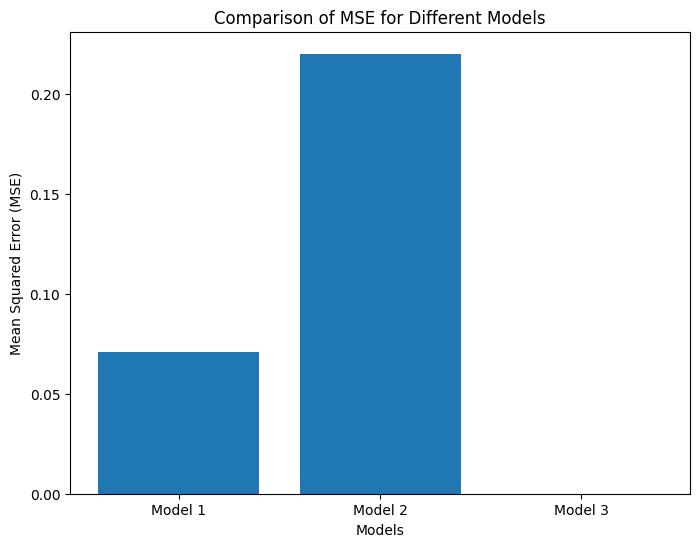

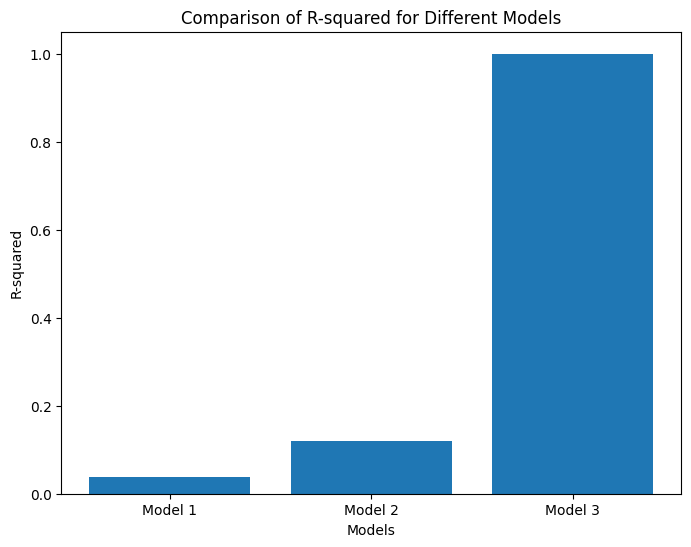

In [121]:
models = ['Model 1', 'Model 2', 'Model 3']

mse_values = [mse, mseu, mseu2]
plt.figure(figsize=(8, 6))
plt.bar(models, mse_values)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE for Different Models')
plt.show()

r2_values = [r2, r2u, r2u2]
plt.figure(figsize=(8, 6))
plt.bar(models, r2_values)
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared for Different Models')
plt.show()


now as we can se our model predicts accuratly our target value


In [144]:
predicted_df = pd.DataFrame({'Predicted': y_predu2})
print(predicted_df)

          Predicted
0     -1.342144e-10
1      8.592173e-11
2     -2.212297e-11
3     -8.498071e-11
4      7.786455e-11
...             ...
49197  9.761371e-11
49198 -2.017090e-10
49199 -1.155608e-10
49200 -6.844174e-12
49201 -7.003527e-11

[49202 rows x 1 columns]


In [129]:
from sklearn.linear_model import LogisticRegression

In [152]:
subset_columns = df.columns.difference(['C36', 'C38', 'C67'])
x = df.drop(['C122'],axis=1)
y = df['C122']
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify =df.C122)

In [154]:
lr = LogisticRegression()
lr.fit(x_trainlr, y_train)
y_predlr = lr.predict(x_testlr)

c:\Users\LENOVO\Anaconda\envs\DataScience\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [149]:
y_predlr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [157]:
confusion_mat = confusion_matrix(y_testlr, y_predlr)
print("Confusion Matrix:")
print(confusion_mat)

accuracy = accuracy_score(y_testlr, y_predlr)
print("Accuracy:", accuracy)

recall_value = recall_score(y_testlr, y_predlr)
print("Recall:", recall_value)

f_score = f1_score(y_testlr, y_predlr)
print("F-Score:", f_score)

precision = precision_score(y_testlr, y_predlr)
print("Precision:", precision)

Confusion Matrix:
[[45230     0]
 [ 3972     0]]
Accuracy: 0.919271574326247


TypeError: 'numpy.float64' object is not callable

c:\Users\LENOVO\Anaconda\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\Anaconda\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\Anaconda\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


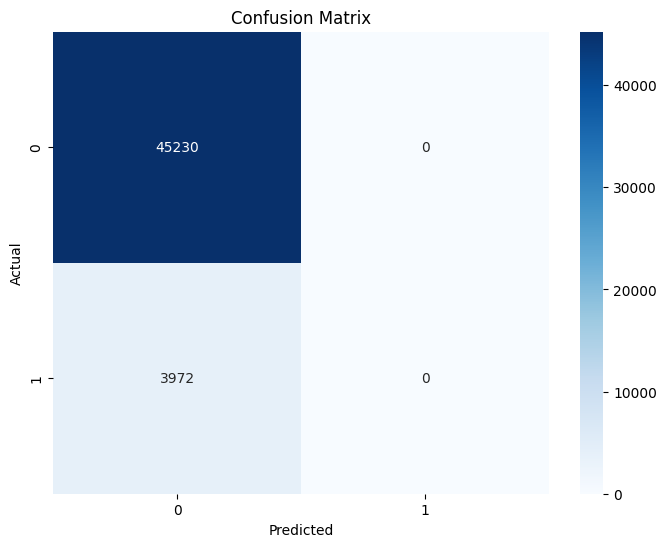

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     45230
           1       0.00      0.00      0.00      3972

    accuracy                           0.92     49202
   macro avg       0.46      0.50      0.48     49202
weighted avg       0.85      0.92      0.88     49202



In [158]:
cm = confusion_matrix(y_testlr, y_predlr)

# Create classification report
report = classification_report(y_testlr, y_predlr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", report)